Import packages

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns  
import datetime
from scipy import stats

Import data:

1. Purchase behaviour.

2. Transaction data.

In [3]:
behaviour_df = pd.read_csv('QVI_purchase_behaviour.csv')
transaction_df = pd.read_csv('QVI_transaction_data.csv')

## Overview of the datasets

In [4]:
behaviour_df.head(3)

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget


In [5]:
behaviour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [6]:
behaviour_df.isnull().sum()

LYLTY_CARD_NBR      0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64

In [7]:
behaviour_df.isna().sum()

LYLTY_CARD_NBR      0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64

In [8]:
behaviour_df.drop_duplicates(inplace=True)

In [9]:
print(f'The unique values for columns: \n'
      f'PREMIUM_CUSTOMER: {behaviour_df["PREMIUM_CUSTOMER"].unique()} \n'
      f'LIFESTAGE: {behaviour_df["LIFESTAGE"].unique()} \n'
      f'# of unique LYLTY_CARD_NBR: {behaviour_df["LYLTY_CARD_NBR"].nunique()}')

The unique values for columns: 
PREMIUM_CUSTOMER: ['Premium' 'Mainstream' 'Budget'] 
LIFESTAGE: ['YOUNG SINGLES/COUPLES' 'YOUNG FAMILIES' 'OLDER SINGLES/COUPLES'
 'MIDAGE SINGLES/COUPLES' 'NEW FAMILIES' 'OLDER FAMILIES' 'RETIREES'] 
# of unique LYLTY_CARD_NBR: 72637


---


Transaction data


---

In [10]:
transaction_df.head(3)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9


In [11]:
transaction_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  int64  
 1   STORE_NBR       264836 non-null  int64  
 2   LYLTY_CARD_NBR  264836 non-null  int64  
 3   TXN_ID          264836 non-null  int64  
 4   PROD_NBR        264836 non-null  int64  
 5   PROD_NAME       264836 non-null  object 
 6   PROD_QTY        264836 non-null  int64  
 7   TOT_SALES       264836 non-null  float64
dtypes: float64(1), int64(6), object(1)
memory usage: 16.2+ MB


In [12]:
transaction_df.isnull().sum()

DATE              0
STORE_NBR         0
LYLTY_CARD_NBR    0
TXN_ID            0
PROD_NBR          0
PROD_NAME         0
PROD_QTY          0
TOT_SALES         0
dtype: int64

In [13]:
transaction_df.isna().sum()

DATE              0
STORE_NBR         0
LYLTY_CARD_NBR    0
TXN_ID            0
PROD_NBR          0
PROD_NAME         0
PROD_QTY          0
TOT_SALES         0
dtype: int64

In [14]:
transaction_df.drop_duplicates(inplace=True)

In [15]:
transaction_df[['PROD_QTY', 'TOT_SALES']].describe()

,PROD_QTY,TOT_SALES
count,264835.000000,264835.000000
mean,1.907308,7.304205
std,0.643655,3.083231
min,1.000000,1.500000
25%,2.000000,5.400000
50%,2.000000,7.400000
75%,2.000000,9.200000
max,200.000000,650.000000


## NOTES

---
- DATE in transaction_df is not in DATETIME format. Although there is no clear date format. After some research I saw this was a specific Excel date. I will convert these to date.


- There seems to be some outliers in both the PROD_QTY and TOT_SALES columns of transaction data. We can see this by the max value being significantly higher than the mean. We will do some quick visualisations to see double check these outliers.


- I will also change PREMIUM_CUSTOMER and LIFESTAGE columns in behaviour_df to categorical type instead of object. 


- We also have dips/salsas. We will remove these as we only want chips.


- We can also look at creating new columns in transaction_df for BRAND, SIZE (grams), and even FLAVOUR of chips. Also break-up the transaction date to Day, Month, Year
---

### To DATETIME

In [16]:
transaction_df['DATE'] = pd.to_datetime(transaction_df['DATE'], origin='1899-12-30', unit='D')

### Visualising outliers

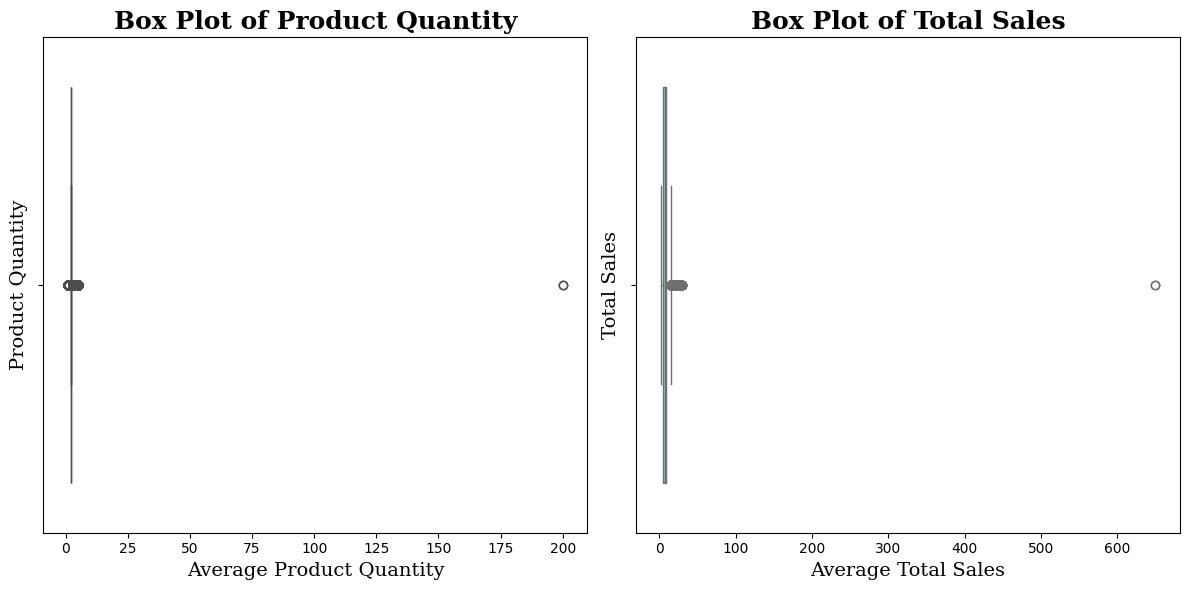

In [17]:
fig, ax = plt.subplots(1,2, figsize=(12, 6))

sns.boxplot(x=transaction_df['PROD_QTY'], ax=ax[0], color='red') 
ax[0].set_xlabel('Average Product Quantity', fontsize=14, fontfamily='serif')  
ax[0].set_ylabel('Product Quantity', fontsize=14, fontfamily='serif')  
ax[0].set_title('Box Plot of Product Quantity', fontsize=18, fontfamily='serif', fontweight='bold')

sns.boxplot(x=transaction_df['TOT_SALES'], ax=ax[1], color='skyblue')
ax[1].set_xlabel('Average Total Sales', fontsize=14, fontfamily='serif')  
ax[1].set_ylabel('Total Sales', fontsize=14, fontfamily='serif')  
ax[1].set_title('Box Plot of Total Sales', fontsize=18, fontfamily='serif', fontweight='bold')

plt.tight_layout()
plt.show()

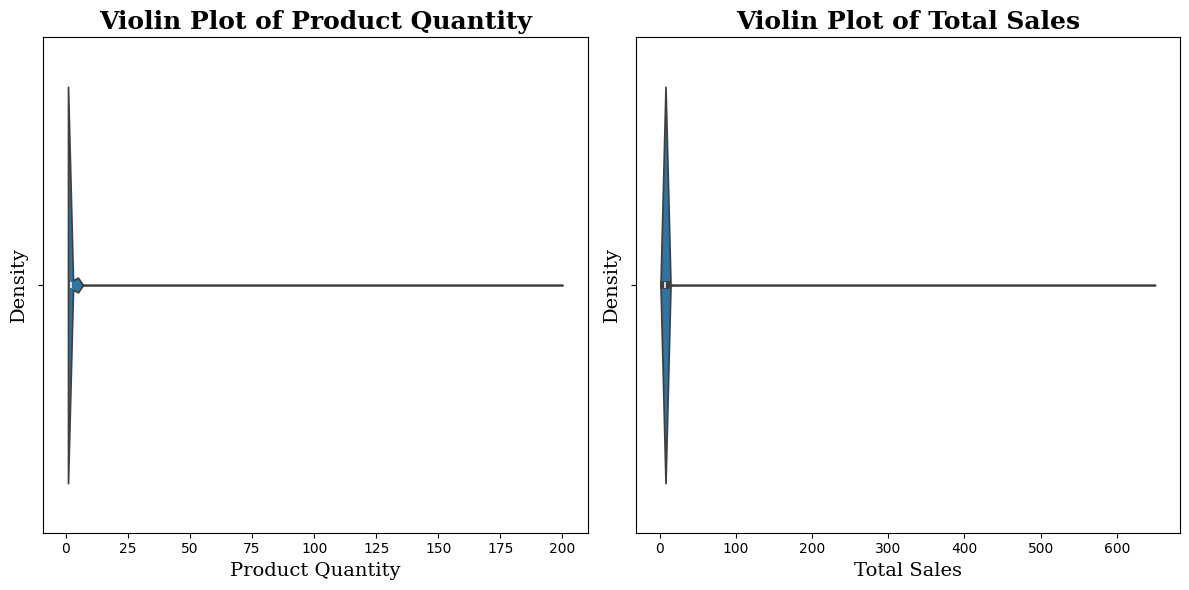

In [18]:
fig, ax = plt.subplots(1,2, figsize=(12, 6))

sns.violinplot(x=transaction_df['PROD_QTY'], ax=ax[0])
ax[0].set_xlabel('Product Quantity', fontsize=14, fontfamily='serif')  
ax[0].set_ylabel('Density', fontsize=14, fontfamily='serif')  
ax[0].set_title('Violin Plot of Product Quantity', fontsize=18, fontfamily='serif', fontweight='bold')

sns.violinplot(x=transaction_df['TOT_SALES'], ax=ax[1])
ax[1].set_xlabel('Total Sales', fontsize=14, fontfamily='serif')  
ax[1].set_ylabel('Density', fontsize=14, fontfamily='serif')  
ax[1].set_title('Violin Plot of Total Sales', fontsize=18, fontfamily='serif', fontweight='bold')

plt.tight_layout()
plt.show()

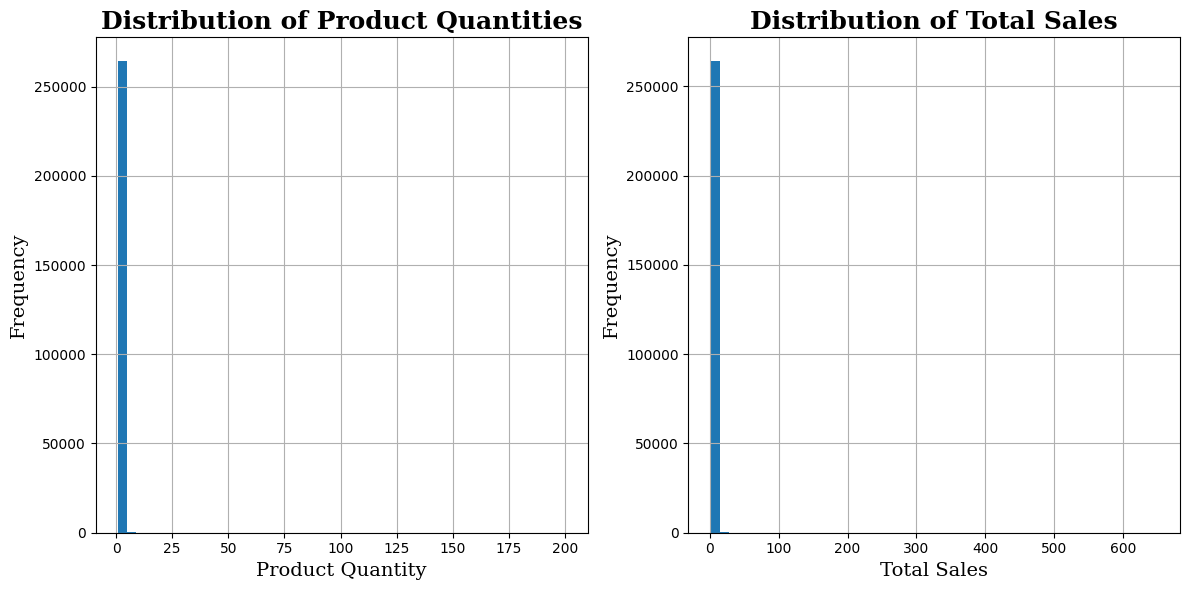

In [19]:

fig, ax = plt.subplots(1,2, figsize=(12, 6))

transaction_df['PROD_QTY'].hist(bins=50, ax=ax[0])  
ax[0].set_xlabel('Product Quantity', fontsize=14, fontfamily='serif')  
ax[0].set_ylabel('Frequency', fontsize=14, fontfamily='serif')  
ax[0].set_title('Distribution of Product Quantities', fontsize=18, fontfamily='serif', fontweight='bold')  

transaction_df['TOT_SALES'].hist(bins=50, ax=ax[1])
ax[1].set_xlabel('Total Sales', fontsize=14, fontfamily='serif')  
ax[1].set_ylabel('Frequency', fontsize=14, fontfamily='serif')  
ax[1].set_title('Distribution of Total Sales', fontsize=18, fontfamily='serif', fontweight='bold')  

plt.tight_layout()
plt.show()

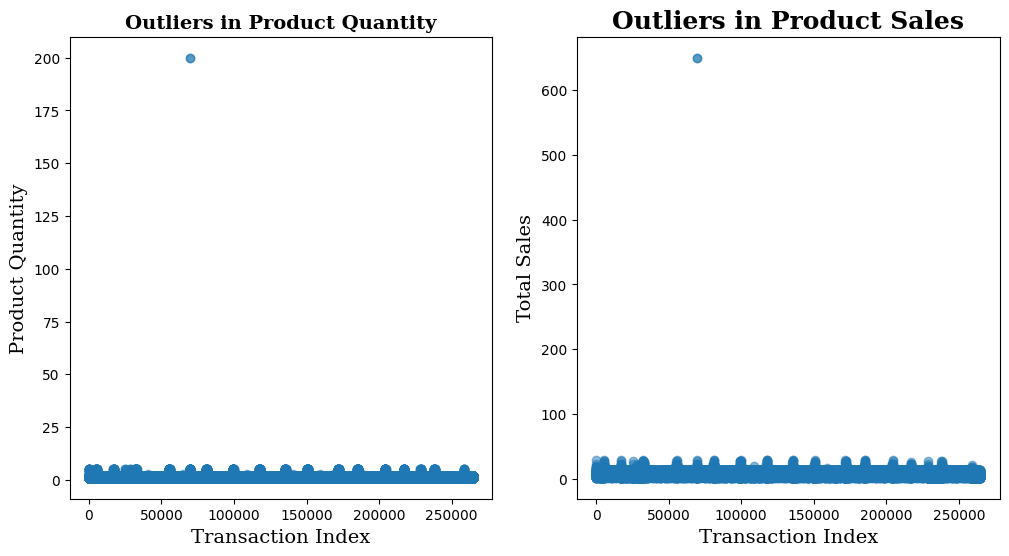

In [20]:
fig, ax = plt.subplots(1,2, figsize=(12, 6))

ax[0].scatter(transaction_df.index, transaction_df['PROD_QTY'], alpha=0.5)  
ax[0].set_xlabel('Transaction Index', fontsize=14, fontfamily='serif')  
ax[0].set_ylabel('Product Quantity', fontsize=14, fontfamily='serif')  
ax[0].set_title('Outliers in Product Quantity', fontsize=14, fontfamily='serif', fontweight='bold')  

ax[1].scatter(transaction_df.index, transaction_df['TOT_SALES'], alpha=0.5)  
ax[1].set_xlabel('Transaction Index', fontsize=14, fontfamily='serif')  
ax[1].set_ylabel('Total Sales', fontsize=14, fontfamily='serif')  
ax[1].set_title('Outliers in Product Sales', fontsize=18, fontfamily='serif', fontweight='bold') 


plt.show()

Lets see if those outliers are in the same row

In [21]:
transaction_df[transaction_df['TOT_SALES'] > 100]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
69762,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0
69763,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0


Delete outliers

In [22]:
transaction_df[transaction_df['TOT_SALES'] > 100].index

Index([69762, 69763], dtype='int64')

In [23]:
transaction_df.drop(index=[69762, 69763], inplace=True)

### Change PREMIUM_CUSTOMER and LIFESTAGE columns to categorical type

In [24]:
behaviour_df['LIFESTAGE'] = behaviour_df['LIFESTAGE'].astype('category')
behaviour_df['PREMIUM_CUSTOMER'] = pd.Categorical(behaviour_df['PREMIUM_CUSTOMER'], categories=['Budget', 'Mainstream', 'Premium'  ], ordered=True)

### Remove dips

In [25]:
transaction_df[transaction_df['PROD_NAME'].str.contains('salsa', case=False, na=False)]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
5,2019-05-19,4,4074,2982,57,Old El Paso Salsa Dip Tomato Mild 300g,1,5.1
25,2019-05-15,39,39144,35506,57,Old El Paso Salsa Dip Tomato Mild 300g,1,5.1
32,2019-05-20,45,45127,41122,64,Red Rock Deli SR Salsa & Mzzrlla 150g,2,5.4
44,2018-08-18,56,56013,50090,39,Smiths Crinkle Cut Tomato Salsa 150g,1,2.6
63,2019-05-15,82,82480,82047,101,Doritos Salsa Medium 300g,1,2.6
...,...,...,...,...,...,...,...,...
264675,2019-04-20,265,265103,263419,59,Old El Paso Salsa Dip Tomato Med 300g,1,5.1
264678,2019-03-30,265,265111,263428,35,Woolworths Mild Salsa 300g,1,1.5
264719,2018-10-28,266,266278,264104,39,Smiths Crinkle Cut Tomato Salsa 150g,1,2.6
264734,2019-01-11,267,267324,264374,41,Doritos Salsa Mild 300g,1,2.6


In [26]:
indices_to_remove = transaction_df[transaction_df['PROD_NAME'].str.contains('Old El Paso Salsa   Dip ', case=False, na=False)].index
transaction_df.drop(index=indices_to_remove, inplace=True)

In [27]:
indices_to_remove = transaction_df[transaction_df['PROD_NAME'].str.contains(r'^Doritos.*Salsa', case=False, na=False)].index
transaction_df.drop(index=indices_to_remove, inplace=True)

In [28]:
indices_to_remove = transaction_df[transaction_df['PROD_NAME'].str.contains(r'^Woolworths.*salsa', case=False, na=False)].index
transaction_df.drop(index=indices_to_remove, inplace=True)

In [29]:
transaction_df[(transaction_df['PROD_NAME'].str.contains('salsa', case=False, na=False)) & (transaction_df['PROD_NBR'] != 64) & (transaction_df['PROD_NBR'] != 39)]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES


We have removed all the salsas!

### Create extra columns to segment data

In [30]:
transaction_df['YEAR'] = transaction_df['DATE'].dt.year
transaction_df['MONTH'] = transaction_df['DATE'].dt.month_name()
transaction_df['DAY'] = transaction_df['DATE'].dt.day_name()


month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July',
               'August', 'September', 'October', 'November', 'December']
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

transaction_df['MONTH'] = pd.Categorical(transaction_df['MONTH'], categories=month_order, ordered=True)
transaction_df['DAY'] = pd.Categorical(transaction_df['DAY'], categories=day_order, ordered=True)

In [31]:
transaction_df['SIZE_IN_GRAMS'] = transaction_df['PROD_NAME'].str.extract(r'(\d+)[gG]').astype('int')


In [32]:
transaction_df['SIZE_IN_GRAMS'].dtype

dtype('int64')

Getting the company names is difficult as there is no delimeter or clear pattern. Furthermore, the same companies are sometimes spelt different. 

The approach I'm taking is to get the first word then correct as many as I can manually

In [33]:
# Updated regex

# Extract company, flavour, and size
transaction_df['BRAND'] = transaction_df['PROD_NAME'].str.extract(r'(^\S+)')

In [70]:
replacements = {
    'Old': 'Old El Paso',  # Example: replace 'Old' with 'Old El Paso'
    'Grain': 'Grain Waves',
    'Natural': 'NCC',
    'Burger': 'Burger Rings',
    'Infzns': 'Infuzions',
    'GrnWves': 'Grain Waves',
    'French': 'French Fries',
    'Cobs': 'Cobs Pop\'d',
    'Red': 'RRD',
    'Snbts': 'Sunbites',
    'Dorito': 'Doritos',
    'Smith': 'Smiths',
    'WW': 'Woolworths'
    
    # Add other replacements here as needed
}
transaction_df['BRAND'] = transaction_df['BRAND'].replace(replacements)
print(transaction_df['BRAND'])
print('No. of unique brand names: ',transaction_df['BRAND'].nunique())
print('The companies: ',transaction_df['BRAND'].unique())

0             Smiths
1           Pringles
2                CCs
3             Kettle
4              Thins
             ...    
249663        Kettle
249664       Doritos
249665    Woolworths
249666      Twisties
249667           NCC
Name: BRAND, Length: 249668, dtype: object
No. of unique brand names:  20
The companies:  ['Smiths' 'Pringles' 'CCs' 'Kettle' 'Thins' 'Infuzions' 'Grain Waves'
 'RRD' 'Twisties' 'Cheezels' 'Tostitos' 'Woolworths' 'Doritos'
 "Cobs Pop'd" 'NCC' 'Burger Rings' 'Cheetos' 'French Fries' 'Sunbites'
 'Tyrrells' nan]


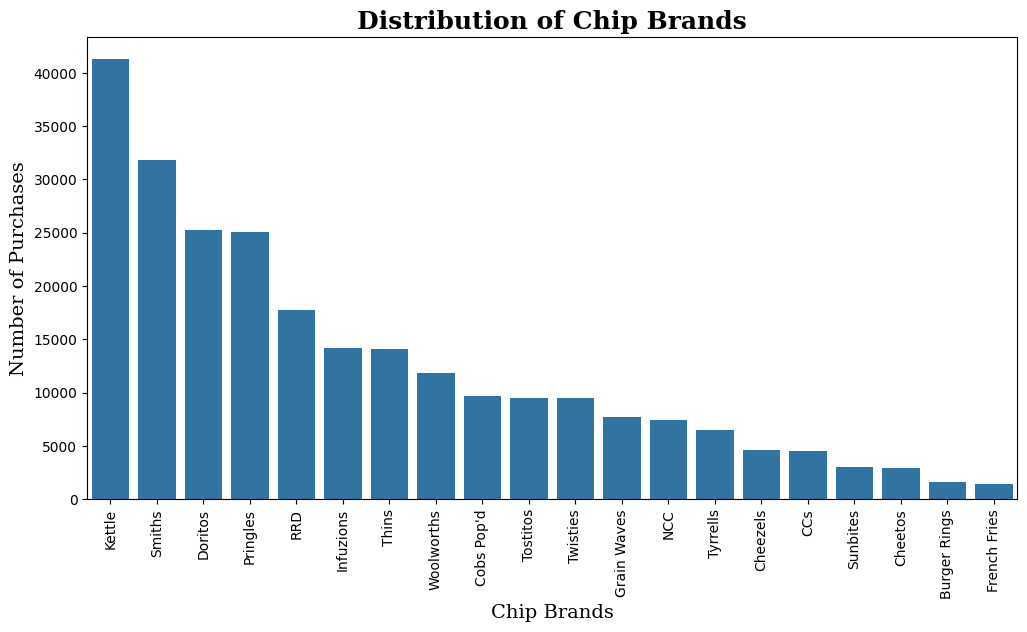

In [71]:
brand_counts = transaction_df['BRAND'].value_counts()

plt.figure(figsize=(12,6))
sns.barplot(x=brand_counts.index, y=brand_counts)


plt.xlabel('Chip Brands', fontsize=14, fontfamily='serif')
plt.ylabel('Number of Purchases', fontsize=14, fontfamily='serif')
plt.title('Distribution of Chip Brands', fontsize=18, fontfamily='serif', fontweight='bold')
plt.xticks(rotation=90) 
plt.show()

---
## We have a few remaining analysis and cleaning to do before we move forward


### Let's investigate the dates more closely. What is the range? Any missing dates? etc.

In [72]:
transaction_df['DATE'].nunique()

365

In [73]:
min(transaction_df['DATE'])

Timestamp('2018-07-01 00:00:00')

In [74]:
max(transaction_df['DATE'])

Timestamp('2019-06-30 00:00:00')

In [75]:
startdate = datetime.date(2018,7,1)
datelist = []
count = 365
for day in range(count):
    date = (startdate + datetime.timedelta(days = day)).isoformat()
    datelist.append(date)

In [76]:
min(datelist)

'2018-07-01'

In [77]:
max(datelist)

'2019-06-30'

So there is one missing date. We can join this to the transactions data to insert the missing date.

In [78]:
df_all_dates = pd.DataFrame(datelist, columns=['DATE'])
df_all_dates['DATE'] = pd.to_datetime(df_all_dates['DATE'])
df_all_dates.head()

,DATE
0,2018-07-01
1,2018-07-02
2,2018-07-03
3,2018-07-04
4,2018-07-05


In [79]:
transaction_df = pd.merge(df_all_dates, transaction_df, on='DATE', how='left')

In [80]:
transaction_df[transaction_df.isnull().any(axis=1)].index

Index([121861], dtype='int64')

In [81]:
transaction_df.iloc[129323,:]

DATE                                  2019-01-06 00:00:00
STORE_NBR                                           254.0
LYLTY_CARD_NBR                                   254000.0
TXN_ID                                           254095.0
PROD_NBR                                              9.0
PROD_NAME         Kettle Tortilla ChpsBtroot&Ricotta 150g
PROD_QTY                                              1.0
TOT_SALES                                             4.6
YEAR                                                 2019
MONTH                                             January
DAY                                                Sunday
SIZE_IN_GRAMS                                       150.0
BRAND                                              Kettle
Name: 129323, dtype: object

In [82]:
transaction_df['YEAR'] = transaction_df['DATE'].dt.year
transaction_df['MONTH'] = transaction_df['DATE'].dt.month_name()
transaction_df['DAY'] = transaction_df['DATE'].dt.day_name()

transaction_df['MONTH'] = pd.Categorical(transaction_df['MONTH'], categories=month_order, ordered=True)
transaction_df['DAY'] = pd.Categorical(transaction_df['DAY'], categories=day_order, ordered=True)

### Lets also look at the number transactions by date

In [83]:
transaction_df.groupby('DATE')['LYLTY_CARD_NBR'].nunique().describe()

count    365.000000
mean     679.879452
std       49.140041
min        0.000000
25%      662.000000
50%      678.000000
75%      697.000000
max      876.000000
Name: LYLTY_CARD_NBR, dtype: float64

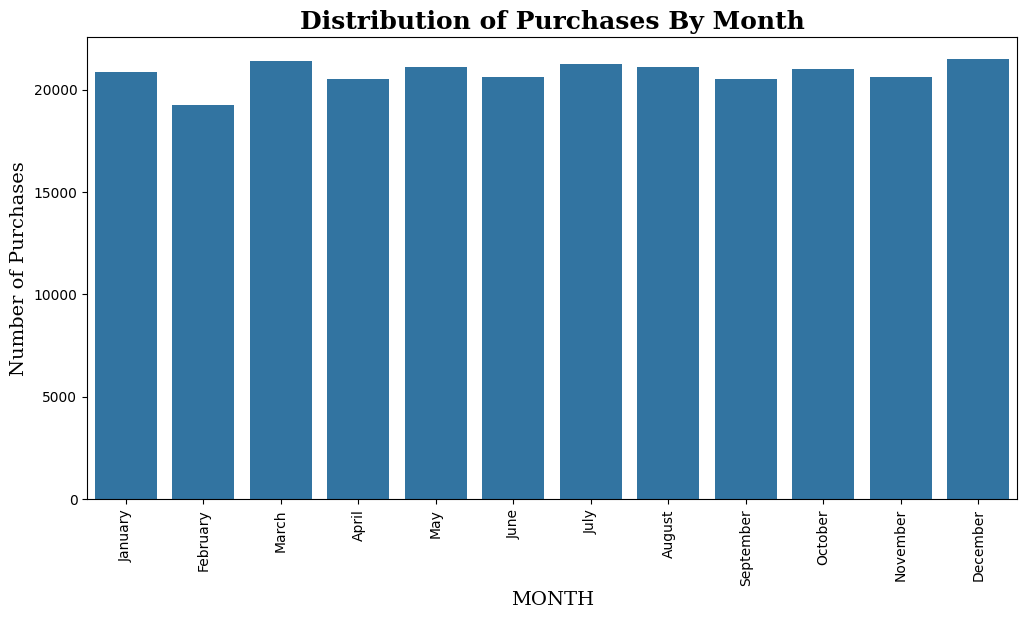

In [84]:
trans_counts = transaction_df['MONTH'].value_counts()

plt.figure(figsize=(12,6))
sns.barplot(x=trans_counts.index, y=trans_counts)


plt.xlabel('MONTH', fontsize=14, fontfamily='serif')
plt.ylabel('Number of Purchases', fontsize=14, fontfamily='serif')
plt.title('Distribution of Purchases By Month', fontsize=18, fontfamily='serif', fontweight='bold')
plt.xticks(rotation=90) 
plt.show()

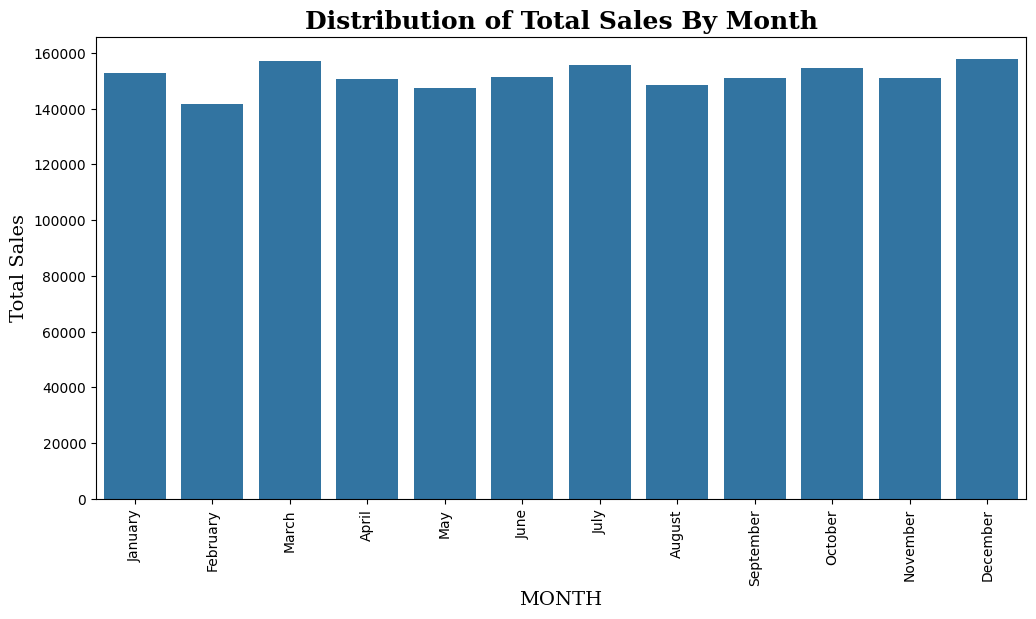

In [85]:
trans_counts = transaction_df.groupby('MONTH', observed=False)['TOT_SALES'].sum()

plt.figure(figsize=(12,6))
sns.barplot(x=trans_counts.index, y=trans_counts)


plt.xlabel('MONTH', fontsize=14, fontfamily='serif')
plt.ylabel('Total Sales', fontsize=14, fontfamily='serif')
plt.title('Distribution of Total Sales By Month', fontsize=18, fontfamily='serif', fontweight='bold')
plt.xticks(rotation=90) 
plt.show()

Seems reasonable.

### Lets merge both datasets to one dataframe.

In [86]:
df = pd.merge(behaviour_df, transaction_df, on='LYLTY_CARD_NBR', how='right')

In [87]:
df[df['LYLTY_CARD_NBR'].isna()]

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,YEAR,MONTH,DAY,SIZE_IN_GRAMS,BRAND
121861,NaN,NaN,NaN,2018-12-25,NaN,NaN,NaN,NaN,NaN,NaN,2018,December,Tuesday,NaN,NaN


They have all been matched excpet for the missing data. This is a bit unrealistic as not everyone would have a loyalty card.

---

In [88]:
df.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,YEAR,MONTH,DAY,SIZE_IN_GRAMS,BRAND
0,47142.0,MIDAGE SINGLES/COUPLES,Budget,2018-07-01,47.0,42540.0,14.0,Smiths Crnkle Chip Orgnl Big Bag 380g,2.0,11.8,2018,July,Sunday,380.0,Smiths
1,55073.0,MIDAGE SINGLES/COUPLES,Budget,2018-07-01,55.0,48884.0,99.0,Pringles Sthrn FriedChicken 134g,2.0,7.4,2018,July,Sunday,134.0,Pringles
2,55073.0,MIDAGE SINGLES/COUPLES,Budget,2018-07-01,55.0,48884.0,91.0,CCs Tasty Cheese 175g,2.0,4.2,2018,July,Sunday,175.0,CCs
3,58351.0,MIDAGE SINGLES/COUPLES,Budget,2018-07-01,58.0,54374.0,102.0,Kettle Mozzarella Basil & Pesto 175g,2.0,10.8,2018,July,Sunday,175.0,Kettle
4,68193.0,MIDAGE SINGLES/COUPLES,Budget,2018-07-01,68.0,65598.0,44.0,Thins Chips Light& Tangy 175g,2.0,6.6,2018,July,Sunday,175.0,Thins


## Analysis

The data is ready for analysis. Lets define some metrics of interest for the client. Remember: The client is particularly interested in customer segments and their chip purchasing behaviour.


We can look at:
- Total sales by premium category.
- Total sales by lifestage.
- How many customers there are in each segment. (This way we can find % of total sales)
- Average chip price per customer for each segment.
- Which chips brands they prefer.
- Distribution of biggest spenders.


### Total Sales

/var/folders/b3/8dnps2js0rz1xgw1gkx248p40000gn/T/ipykernel_9218/713680122.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total_sales = df.groupby('PREMIUM_CUSTOMER')['TOT_SALES'].sum()


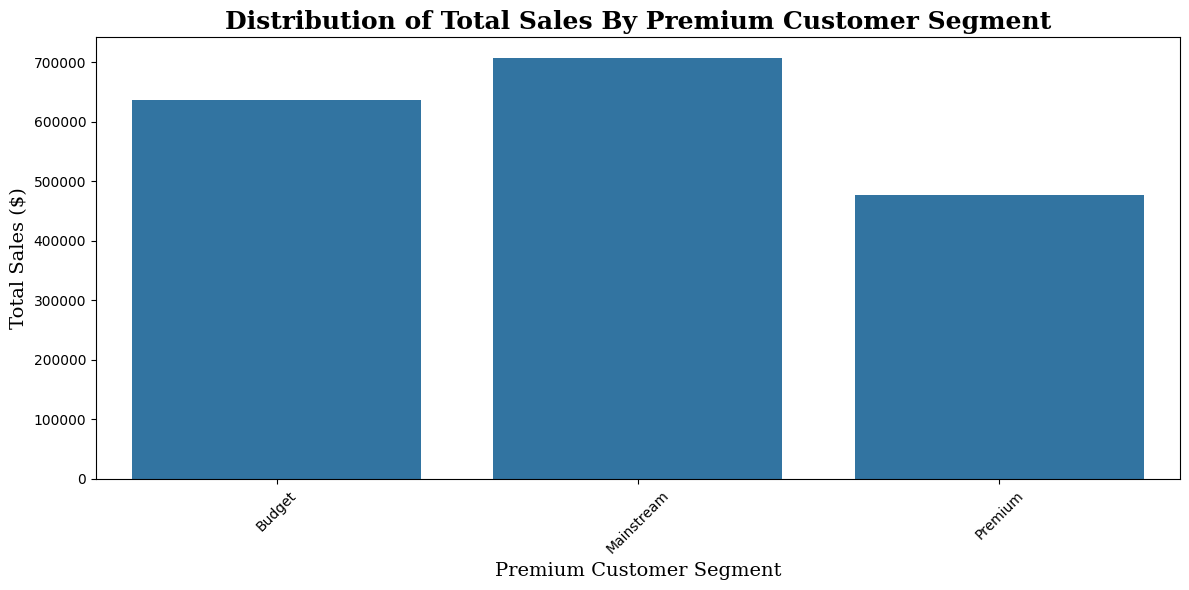

In [ ]:
total_sales = df.groupby('PREMIUM_CUSTOMER')['TOT_SALES'].sum()

plt.figure(figsize=(12,6))
ax = sns.barplot(x=total_sales.index, y=total_sales)

plt.xlabel('Premium Customer Segment', fontsize=14, fontfamily='serif')
plt.ylabel('Total Sales (\$)', fontsize=14, fontfamily='serif')
plt.title('Distribution of Total Sales By Premium Customer Segment', fontsize=18, fontweight='bold', fontfamily='serif')
plt.xticks(rotation=45) 
# ax.spines['top'].set_visible(False)
# ax.spines['right'].set_visible(False)  
# ax.spines['bottom'].set_visible(False) 

plt.tight_layout()
plt.show()

# fontweight="bold", fontfamily='serif', fontsize=15

Total sales by lifestage

/var/folders/b3/8dnps2js0rz1xgw1gkx248p40000gn/T/ipykernel_9218/3535802618.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total_sales = df.groupby('LIFESTAGE')['TOT_SALES'].sum()


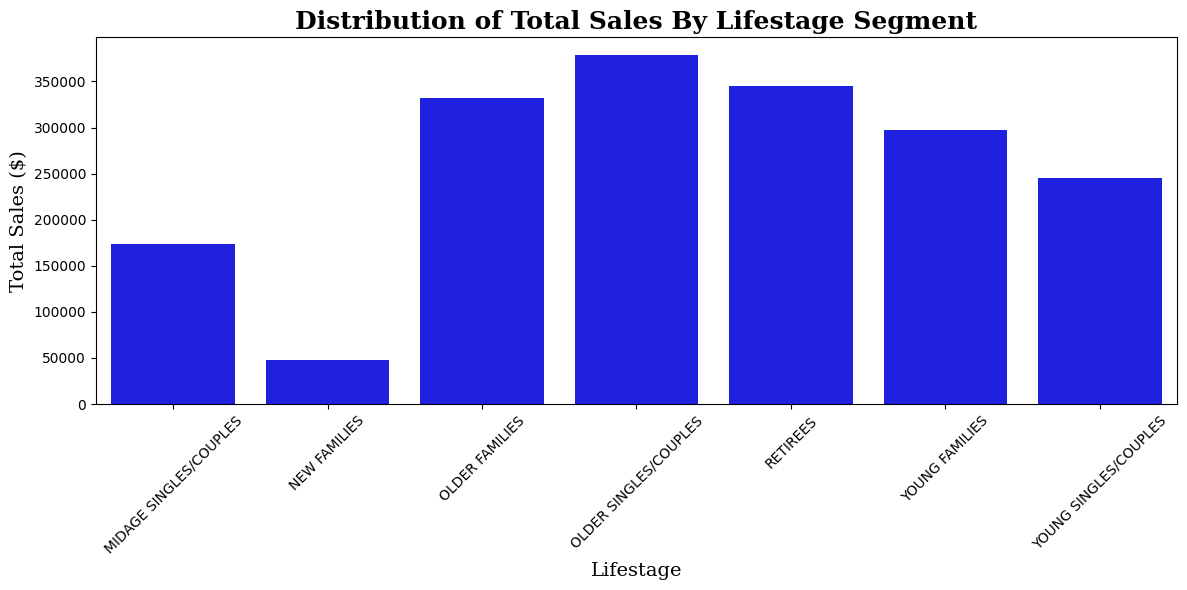

In [90]:
total_sales = df.groupby('LIFESTAGE')['TOT_SALES'].sum()

plt.figure(figsize=(12,6))
sns.barplot(x=total_sales.index, y=total_sales, color='blue')

plt.xlabel('Lifestage', fontsize=14, fontfamily='serif')
plt.ylabel('Total Sales (\$)', fontsize=14, fontfamily='serif')
plt.title('Distribution of Total Sales By Lifestage Segment', fontsize=18, fontweight='bold', fontfamily='serif')
plt.xticks(rotation=45) 


plt.tight_layout()
plt.show()

In [91]:
# Step 1: Create the sums crosstab
truncated_df = df.loc[:, ['LIFESTAGE', 'PREMIUM_CUSTOMER', 'TOT_SALES']].copy()

# Replace the lambda function with 'sum' to get the total sales for each group
crosstab = truncated_df.pivot_table(index='LIFESTAGE', columns='PREMIUM_CUSTOMER', values='TOT_SALES', aggfunc='sum', margins=True, observed=False)

# Step 2: Create the percentages crosstab
crosstab2 = crosstab.iloc[:, :].copy()  # Keep all rows, including 'All'
crosstab2 = crosstab2.astype('float64')  # Ensure float for percentage calculations
crosstab2.iloc[:-1, :-1] = crosstab2.iloc[:-1, :-1].div(crosstab.iloc[:-1, -1], axis=0).round(2)  # Row-wise division for percentages
crosstab2['All'] = (crosstab2['All'] / sum(crosstab2.iloc[-1:, -1])).round(2)  # Percentage for 'All' row

# Step 3: Adjust the indices to include 'Sum' and 'Percentage' as a multi-level index
crosstab.index = pd.MultiIndex.from_product([crosstab.index, ['Sum']], names=['LIFESTAGE', 'Metric'])
crosstab2.index = pd.MultiIndex.from_product([crosstab2.index, ['Percentage']], names=['LIFESTAGE', 'Metric'])

# Step 4: Concatenate along rows, then sort so Sum and Percentage alternate
joined_pivot = pd.concat([crosstab, crosstab2]).sort_index(level=0, sort_remaining=False)

# Step 5: Reverse sort to move "Total" to the bottom
joined_pivot = joined_pivot.sort_index(level=0, ascending=False)

# Step 6: Rename "All" to "Total" AFTER sorting
joined_pivot.rename(index={'All': 'Total'}, columns={'All': 'Total'}, inplace=True)

# Step 7: Display the result
print(joined_pivot)


PREMIUM_CUSTOMER                      Budget  Mainstream    Premium  \
LIFESTAGE              Metric                                         
YOUNG SINGLES/COUPLES  Sum          57622.40   148337.20   39347.90   
                       Percentage       0.23        0.60       0.16   
YOUNG FAMILIES         Sum         130919.05    87227.85   79249.10   
                       Percentage       0.44        0.29       0.27   
RETIREES               Sum         106606.20   146328.75   91951.95   
                       Percentage       0.31        0.42       0.27   
OLDER SINGLES/COUPLES  Sum         128683.80   125737.10  124457.05   
                       Percentage       0.34        0.33       0.33   
OLDER FAMILIES         Sum         158379.95    97280.85   75983.00   
                       Percentage       0.48        0.29       0.23   
NEW FAMILIES           Sum          20716.05    16078.00   10861.70   
                       Percentage       0.43        0.34       0.23   
MIDAGE

### How many customers there are in each segment. 

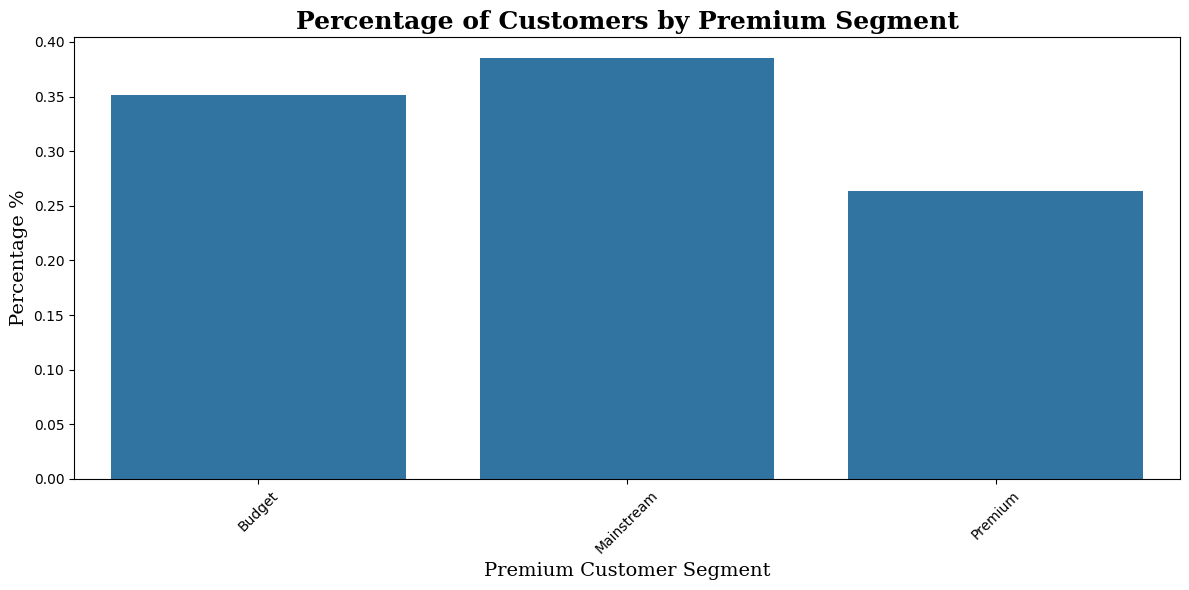

In [92]:
segment_count = df['PREMIUM_CUSTOMER'].value_counts()
total_count = df['PREMIUM_CUSTOMER'].count()

plt.figure(figsize=(12,6))
ax = sns.barplot(x=segment_count.index, y=segment_count/total_count)
plt.xlabel('Premium Customer Segment', fontsize=14, fontfamily='serif')
plt.ylabel('Percentage %', fontsize=14, fontfamily='serif')
plt.title('Percentage of Customers by Premium Segment', fontsize=18, fontweight='bold', fontfamily='serif')
plt.xticks(rotation=45) 

plt.tight_layout()
plt.show()

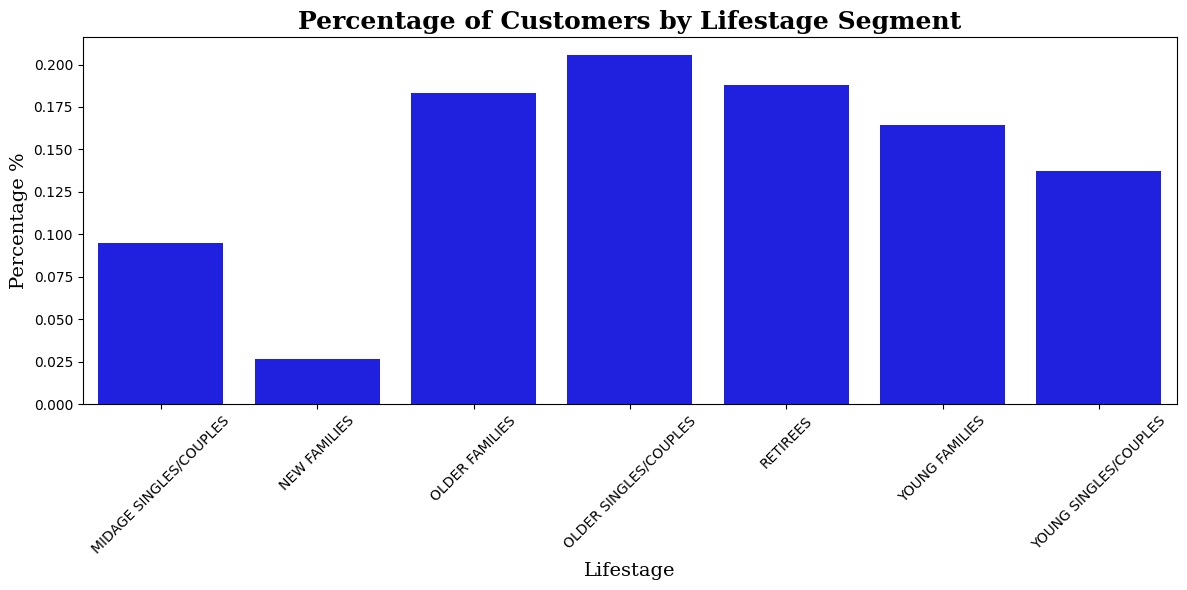

In [93]:
segment_count = df['LIFESTAGE'].value_counts()
total_count = df['LIFESTAGE'].count()

plt.figure(figsize=(12,6))
ax = sns.barplot(x=segment_count.index, y=segment_count/total_count, color='blue')
plt.xlabel('Lifestage', fontsize=14, fontfamily='serif')
plt.ylabel('Percentage %', fontsize=14, fontfamily='serif')
plt.title('Percentage of Customers by Lifestage Segment', fontsize=18, fontweight='bold', fontfamily='serif')
plt.xticks(rotation=45) 

plt.tight_layout()
plt.show()

Multivariate visualisation of # of lifestage and premium customer using a pivot table

In [94]:
# Step 1: Create the counts crosstab
truncated_df = df.loc[:, ['LIFESTAGE', 'PREMIUM_CUSTOMER']].copy()
crosstab = truncated_df.pivot_table(index='LIFESTAGE', columns='PREMIUM_CUSTOMER', aggfunc=lambda x: len(x), margins=True, observed=False)

# Step 2: Create the percentages crosstab
crosstab2 = crosstab.iloc[:, :].copy()  # Keep all rows, including 'All'
crosstab2 = crosstab2.astype('float64')  # Ensure float for percentage calculations
crosstab2.iloc[:-1, :-1] = crosstab2.iloc[:-1, :-1].div(crosstab.iloc[:-1, -1], axis=0).round(2)  # Row-wise division for percentages
crosstab2['All'] = (crosstab2['All'] / sum(crosstab2.iloc[-1:,-1])).round(2)  # Percentage for 'All' row

# Step 3: Adjust the indices to include 'Count' and 'Percentage' as a multi-level index
crosstab.index = pd.MultiIndex.from_product([crosstab.index, ['Count']], names=['LIFESTAGE', 'Metric'])
crosstab2.index = pd.MultiIndex.from_product([crosstab2.index, ['Percentage']], names=['LIFESTAGE', 'Metric'])

# Step 4: Concatenate along rows, then sort so Count and Percentage alternate
joined_pivot = pd.concat([crosstab, crosstab2]).sort_index(level=0, sort_remaining=False)

# Step 5: Reverse sort to move "All" to the bottom
joined_pivot = joined_pivot.sort_index(level=0, ascending=False)

# Step 6: Rename "All" to "Total" AFTER sorting
joined_pivot.rename(index={'All': 'Total'}, columns={'All': 'Total'}, inplace=True)

# Step 7: Display the result
print(joined_pivot)


PREMIUM_CUSTOMER                     Budget  Mainstream   Premium      Total
LIFESTAGE              Metric                                               
YOUNG SINGLES/COUPLES  Percentage      0.25        0.57      0.17       0.14
                       Count        8687.00    19705.00   5917.00   34309.00
YOUNG FAMILIES         Percentage      0.44        0.30      0.27       0.16
                       Count       17995.00    12121.00  10919.00   41035.00
RETIREES               Percentage      0.31        0.43      0.26       0.19
                       Count       14364.00    20202.00  12368.00   46934.00
OLDER SINGLES/COUPLES  Percentage      0.34        0.34      0.33       0.21
                       Count       17345.00    17276.00  16741.00   51362.00
OLDER FAMILIES         Percentage      0.48        0.29      0.23       0.18
                       Count       21808.00    13411.00  10546.00   45765.00
NEW FAMILIES           Percentage      0.43        0.34      0.23       0.03

### Average Price Paid For Chips.


In [95]:
average_df = df.loc[:, ['PREMIUM_CUSTOMER', 'LIFESTAGE', 'PROD_QTY', 'TOT_SALES']]
average_df['PRICE_PER_PACK'] = average_df['TOT_SALES']/average_df['PROD_QTY']

print(average_df.groupby('PREMIUM_CUSTOMER', observed=False)['PRICE_PER_PACK'].mean().round(2).sort_values(ascending=False))
print(average_df.groupby('LIFESTAGE', observed=False)['PRICE_PER_PACK'].mean().round(2).sort_values(ascending=False))

print(average_df.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'], observed=False)['PRICE_PER_PACK'].mean().round(2).sort_values(ascending=False))

PREMIUM_CUSTOMER
Mainstream    3.86
Premium       3.80
Budget        3.79
Name: PRICE_PER_PACK, dtype: float64
LIFESTAGE
NEW FAMILIES              3.89
RETIREES                  3.88
YOUNG SINGLES/COUPLES     3.88
MIDAGE SINGLES/COUPLES    3.86
OLDER SINGLES/COUPLES     3.85
YOUNG FAMILIES            3.74
OLDER FAMILIES            3.72
Name: PRICE_PER_PACK, dtype: float64
LIFESTAGE               PREMIUM_CUSTOMER
YOUNG SINGLES/COUPLES   Mainstream          4.05
MIDAGE SINGLES/COUPLES  Mainstream          3.98
RETIREES                Premium             3.91
NEW FAMILIES            Budget              3.91
RETIREES                Budget              3.91
NEW FAMILIES            Mainstream          3.90
OLDER SINGLES/COUPLES   Premium             3.88
                        Budget              3.87
NEW FAMILIES            Premium             3.86
RETIREES                Mainstream          3.83
OLDER SINGLES/COUPLES   Mainstream          3.80
MIDAGE SINGLES/COUPLES  Premium             3

Perform a t-test between .......................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

To see how statistically different the means are and if they are completely or partially different.

---

### Here we will perform t-test between the top three multi-segments:
- YOUNG SINGLES/COUPLES - Mainstream
- MIDAGE SINGLES/COUPLES - Mainstream
- RETIREES - Premium

In [96]:
# Choose an alpha level (typically 0.05)
alpha = 0.05

# t-test between  Mainstream - YOUNG SINGLES/COUPLES and Mainstream - MIDAGE SINGLES/COUPLES
a = average_df[(average_df['PREMIUM_CUSTOMER'] == 'Mainstream') & (df['LIFESTAGE'] == 'YOUNG SINGLES/COUPLES')].loc[:,'PRICE_PER_PACK']
b = average_df[(average_df['PREMIUM_CUSTOMER'] == 'Mainstream') & (df['LIFESTAGE'] == 'MIDAGE SINGLES/COUPLES')].loc[:,'PRICE_PER_PACK']
t_value, p_value = stats.ttest_ind(a,b)

# Check significance
if p_value < alpha:
    print("Reject the null hypothesis: Significant difference.")
else:
    print("Fail to reject the null hypothesis: No significant difference.")

Reject the null hypothesis: Significant difference.


In [97]:
# t-test between Mainstream - MIDAGE SINGLES/COUPLES and Premium - RETIREES
a = average_df[(average_df['PREMIUM_CUSTOMER'] == 'Mainstream') & (df['LIFESTAGE'] == 'MIDAGE SINGLES/COUPLES')].loc[:,'PRICE_PER_PACK']
b = average_df[(average_df['PREMIUM_CUSTOMER'] == 'Premium') & (df['LIFESTAGE'] == 'RETIREES')].loc[:,'PRICE_PER_PACK']
t_value, p_value = stats.ttest_ind(a,b)

# Check significance
if p_value < alpha:
    print("Reject the null hypothesis: Significant difference.")
else:
    print("Fail to reject the null hypothesis: No significant difference.")

Reject the null hypothesis: Significant difference.


In [98]:
# t-test between Mainstream - YOUNG SINGLES/COUPLES and Premium - RETIREES
a = average_df[(average_df['PREMIUM_CUSTOMER'] == 'Mainstream') & (df['LIFESTAGE'] == 'YOUNG SINGLES/COUPLES')].loc[:,'PRICE_PER_PACK']
b = average_df[(average_df['PREMIUM_CUSTOMER'] == 'Premium') & (df['LIFESTAGE'] == 'RETIREES')].loc[:,'PRICE_PER_PACK']
t_value, p_value = stats.ttest_ind(a,b)

# Check significance
if p_value < alpha:
    print("Reject the null hypothesis: Significant difference.")
else:
    print("Fail to reject the null hypothesis: No significant difference.")

Reject the null hypothesis: Significant difference.


### Favourite Chip for YOUNG SINGLES/COUPLES - Mainstream, MIDAGE SINGLES/COUPLES - Mainstream & RETIREES - Premium

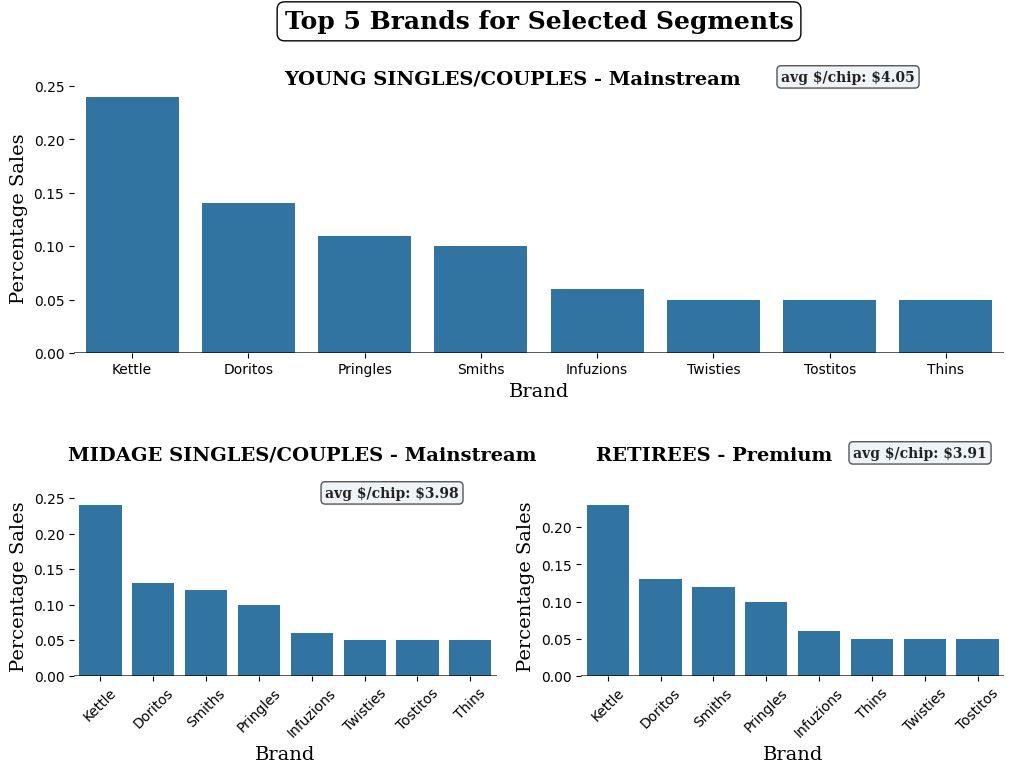

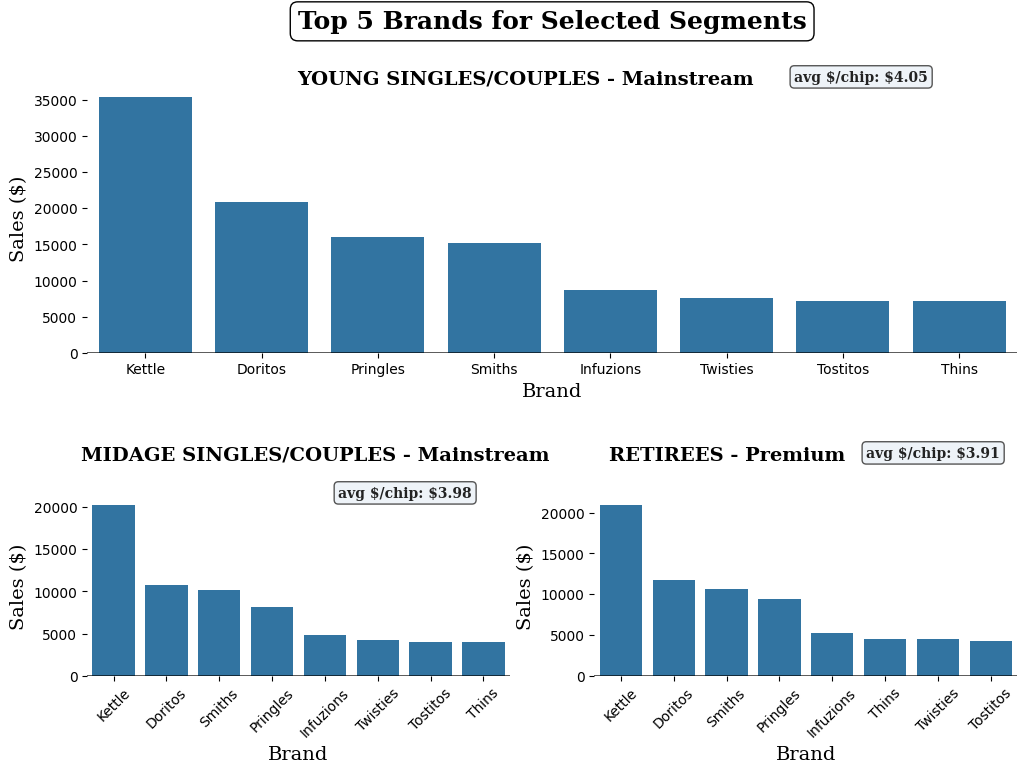

In [99]:
# Create 2x2 grid but adjust height
fig, ax = plt.subplots(2, 2, figsize=(12, 8), gridspec_kw={'height_ratios': [2, 1]})

# Step 1: Get the top 5 brands per LIFESTAGE & PREMIUM_CUSTOMER
brands_per_lifestage = df.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER', 'BRAND'], observed=False)['TOT_SALES'].sum()

# 1st Plot: MIDAGE SINGLES/COUPLES - Mainstream
percent_top_brands = (
    brands_per_lifestage.loc[('MIDAGE SINGLES/COUPLES', 'Mainstream')].nlargest(8)
    / brands_per_lifestage.loc[('MIDAGE SINGLES/COUPLES', 'Mainstream')].sum()
).round(2).reset_index()

sns.barplot(data=percent_top_brands, x='BRAND', y='TOT_SALES', ax=ax[1, 0])
# ax[1, 0].set_title('MIDAGE SINGLES/COUPLES - Mainstream', fontsize=14, fontfamily='serif', fontweight='bold')
ax[1,0].set_xlabel('Brand', fontsize=14, fontfamily='serif')
ax[1,0].set_ylabel('Percentage Sales', fontsize=14, fontfamily='serif')

# Fix x-ticks
ax[1,0].set_xticks(range(len(percent_top_brands)))
ax[1,0].set_xticklabels(percent_top_brands['BRAND'], rotation=45)

# 2nd Plot: RETIREES - Premium
percent_top_brands = (
    brands_per_lifestage.loc[('RETIREES', 'Premium')].nlargest(8)
    / brands_per_lifestage.loc[('RETIREES', 'Premium')].sum()
).round(2).reset_index()

sns.barplot(data=percent_top_brands, x='BRAND', y='TOT_SALES', ax=ax[1, 1])
# ax[1, 1].set_title('RETIREES - Premium', fontsize=14, fontfamily='serif', fontweight='bold')
ax[1,1].set_xlabel('Brand', fontsize=14, fontfamily='serif')
ax[1,1].set_ylabel('Percentage Sales', fontsize=14, fontfamily='serif')

# Fix x-ticks
ax[1,1].set_xticks(range(len(percent_top_brands)))
ax[1,1].set_xticklabels(percent_top_brands['BRAND'], rotation=45)

# Horizontal line on x-axis
for i in range(2):
    ax[1,i].axhline(y = 0, color = 'black', linewidth = 1.3, alpha = .7)

# Remove spines
for i in range(2):
    for s in ['top', 'right','bottom','left']:
        ax[1,i].spines[s].set_visible(False)

# Remove unnecessary subplots
fig.delaxes(ax[0, 1])  # Remove empty subplot
fig.delaxes(ax[0, 0])  # Remove empty subplot

# Add a big top plot
ax_top = fig.add_subplot(2, 1, 1)

# 3rd Plot: YOUNG SINGLES/COUPLES - Mainstream
percent_top_brands = (
    brands_per_lifestage.loc[('YOUNG SINGLES/COUPLES', 'Mainstream')].nlargest(8)
    / brands_per_lifestage.loc[('YOUNG SINGLES/COUPLES', 'Mainstream')].sum()
).round(2).reset_index()

sns.barplot(data=percent_top_brands, x='BRAND', y='TOT_SALES', ax=ax_top)

ax_top.set_xlabel('Brand', fontsize=14, fontfamily='serif')
ax_top.set_ylabel('Percentage Sales', fontsize=14, fontfamily='serif')
ax_top.set_title('Top 5 Brands for Selected Segments', pad=40, fontsize=18, fontfamily='serif', fontweight='bold',
                 bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3'))

# Horizontal line on x-axis
ax_top.axhline(y = 0, color = 'black', linewidth = 1.3, alpha = .7)

# Remove spines
for s in ['top', 'right','bottom','left']:
    ax_top.spines[s].set_visible(False)

# Fix x-ticks
ax_top.set_xticks(range(len(percent_top_brands)))
ax_top.set_xticklabels(percent_top_brands['BRAND'], rotation=0)

# Add titles
fig.text(.30, .85, 'YOUNG SINGLES/COUPLES - Mainstream', fontsize=14, fontweight='bold', fontfamily='serif')
fig.text(.12, .38, 'MIDAGE SINGLES/COUPLES - Mainstream', fontsize=14, fontfamily='serif', fontweight='bold')
fig.text(.56, .38, 'RETIREES - Premium', fontsize=14, fontfamily='serif', fontweight='bold')

# Add average price/chip
fig.text(
    .77, .85, 'avg \$/chip: $4.05',  
    fontsize=10, fontfamily='serif', fontweight='bold',
    ha='center', va='bottom', color='#222222',
    bbox=dict(facecolor='#eef3f8', edgecolor='#555555', boxstyle='round,pad=0.3')
)

fig.text(
    .39, .33, 'avg \$/chip: $3.98',  
    fontsize=10, fontfamily='serif', fontweight='bold',
    ha='center', va='bottom', color='#222222',
    bbox=dict(facecolor='#eef3f8', edgecolor='#555555', boxstyle='round,pad=0.3')
)

fig.text(
    .83, .38, 'avg \$/chip: $3.91',  
    fontsize=10, fontfamily='serif', fontweight='bold',
    ha='center', va='bottom', color='#222222',
    bbox=dict(facecolor='#eef3f8', edgecolor='#555555', boxstyle='round,pad=0.3')
)


plt.subplots_adjust(top=.85)
plt.show()





# Create 2x2 grid but adjust height
fig, ax = plt.subplots(2, 2, figsize=(12, 8), gridspec_kw={'height_ratios': [2, 1]})

# Step 1: Get the top 5 brands per LIFESTAGE & PREMIUM_CUSTOMER
brands_per_lifestage = df.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER', 'BRAND'], observed=False)['TOT_SALES'].sum()

# 1st Plot: MIDAGE SINGLES/COUPLES - Mainstream
percent_top_brands = (
    brands_per_lifestage.loc[('MIDAGE SINGLES/COUPLES', 'Mainstream')].nlargest(8)
).reset_index()

sns.barplot(data=percent_top_brands, x='BRAND', y='TOT_SALES', ax=ax[1, 0])
# ax[1, 0].set_title('MIDAGE SINGLES/COUPLES - Mainstream', fontsize=14, fontfamily='serif', fontweight='bold')
ax[1,0].set_xlabel('Brand', fontsize=14, fontfamily='serif')
ax[1,0].set_ylabel('Sales ($)', fontsize=14, fontfamily='serif')

# Fix x-ticks
ax[1,0].set_xticks(range(len(percent_top_brands)))
ax[1,0].set_xticklabels(percent_top_brands['BRAND'], rotation=45)

# 2nd Plot: RETIREES - Premium
percent_top_brands = (
    brands_per_lifestage.loc[('RETIREES', 'Premium')].nlargest(8)
).reset_index()

sns.barplot(data=percent_top_brands, x='BRAND', y='TOT_SALES', ax=ax[1, 1])
# ax[1, 1].set_title('RETIREES - Premium', fontsize=14, fontfamily='serif', fontweight='bold')
ax[1,1].set_xlabel('Brand', fontsize=14, fontfamily='serif')
ax[1,1].set_ylabel('Sales ($)', fontsize=14, fontfamily='serif')

# Fix x-ticks
ax[1,1].set_xticks(range(len(percent_top_brands)))
ax[1,1].set_xticklabels(percent_top_brands['BRAND'], rotation=45)

# Horizontal line on x-axis
for i in range(2):
    ax[1,i].axhline(y = 0, color = 'black', linewidth = 1.3, alpha = .7)

# Remove spines
for i in range(2):
    for s in ['top', 'right','bottom','left']:
        ax[1,i].spines[s].set_visible(False)

# Remove unnecessary subplots
fig.delaxes(ax[0, 1])  # Remove empty subplot
fig.delaxes(ax[0, 0])  # Remove empty subplot

# Add a big top plot
ax_top = fig.add_subplot(2, 1, 1)

# 3rd Plot: YOUNG SINGLES/COUPLES - Mainstream
percent_top_brands = (
    brands_per_lifestage.loc[('YOUNG SINGLES/COUPLES', 'Mainstream')].nlargest(8)
).reset_index()

sns.barplot(data=percent_top_brands, x='BRAND', y='TOT_SALES', ax=ax_top)

ax_top.set_xlabel('Brand', fontsize=14, fontfamily='serif')
ax_top.set_ylabel('Sales ($)', fontsize=14, fontfamily='serif')
ax_top.set_title('Top 5 Brands for Selected Segments', pad=40, fontsize=18, fontfamily='serif', fontweight='bold',
                 bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3'))

# Horizontal line on x-axis
ax_top.axhline(y = 0, color = 'black', linewidth = 1.3, alpha = .7)

# Remove spines
for s in ['top', 'right','bottom','left']:
    ax_top.spines[s].set_visible(False)

# Fix x-ticks
ax_top.set_xticks(range(len(percent_top_brands)))
ax_top.set_xticklabels(percent_top_brands['BRAND'], rotation=0)

# Add titles
fig.text(.30, .85, 'YOUNG SINGLES/COUPLES - Mainstream', fontsize=14, fontweight='bold', fontfamily='serif')
fig.text(.12, .38, 'MIDAGE SINGLES/COUPLES - Mainstream', fontsize=14, fontfamily='serif', fontweight='bold')
fig.text(.56, .38, 'RETIREES - Premium', fontsize=14, fontfamily='serif', fontweight='bold')

# Add average price/chip
fig.text(
    .77, .85, 'avg \$/chip: $4.05',  
    fontsize=10, fontfamily='serif', fontweight='bold',
    ha='center', va='bottom', color='#222222',
    bbox=dict(facecolor='#eef3f8', edgecolor='#555555', boxstyle='round,pad=0.3')
)

fig.text(
    .39, .33, 'avg \$/chip: $3.98',  
    fontsize=10, fontfamily='serif', fontweight='bold',
    ha='center', va='bottom', color='#222222',
    bbox=dict(facecolor='#eef3f8', edgecolor='#555555', boxstyle='round,pad=0.3')
)

fig.text(
    .83, .38, 'avg \$/chip: $3.91',  
    fontsize=10, fontfamily='serif', fontweight='bold',
    ha='center', va='bottom', color='#222222',
    bbox=dict(facecolor='#eef3f8', edgecolor='#555555', boxstyle='round,pad=0.3')
)


plt.subplots_adjust(top=.85)
plt.show()

They all purchase Kettle chips about 10%-15% more than the second highest purchased chip brand. We also see mainstream young singles/couples spend around 75% more on Kettle, Doritos and Pringles which are their favourite 3 purchases.

---

Here we will perform t-tests between the individual customer segments

In [ ]:
# Choose an alpha level (typically 0.05)
alpha = 0.05

# t-test between Premium and Budget Customers
a = average_df[average_df['PREMIUM_CUSTOMER'] == 'Premium'].loc[:,'PRICE_PER_PACK']
b = average_df[average_df['PREMIUM_CUSTOMER'] == 'Budget'].loc[:,'PRICE_PER_PACK']
t_value, p_value = stats.ttest_ind(a,b)

# Check significance
if p_value < alpha:
    print("Reject the null hypothesis: Significant difference.")
else:
    print("Fail to reject the null hypothesis: No significant difference.")

Reject the null hypothesis: Significant difference.


In [ ]:
# t-test between Budget and Mainstream Customers
a = average_df[average_df['PREMIUM_CUSTOMER'] == 'Mainstream'].loc[:,'PRICE_PER_PACK']
b = average_df[average_df['PREMIUM_CUSTOMER'] == 'Budget'].loc[:,'PRICE_PER_PACK']
t_value, p_value = stats.ttest_ind(a,b)

# Check significance
if p_value < alpha:
    print("Reject the null hypothesis: Significant difference.")
else:
    print("Fail to reject the null hypothesis: No significant difference.")

Reject the null hypothesis: Significant difference.


In [ ]:
# t-test between YOUNG SINGLES/COUPLES and OLDER SINGLES/COUPLES Customers
a = average_df[average_df['LIFESTAGE'] == 'YOUNG SINGLES/COUPLES'].loc[:,'PRICE_PER_PACK']
b = average_df[average_df['LIFESTAGE'] == 'OLDER SINGLES/COUPLES'].loc[:,'PRICE_PER_PACK']
t_value, p_value = stats.ttest_ind(a,b)

# Check significance
if p_value < alpha:
    print("Reject the null hypothesis: Significant difference.")
else:
    print("Fail to reject the null hypothesis: No significant difference.")

Reject the null hypothesis: Significant difference.


In [ ]:
# t-test between NEW FAMILIES and OLDER FAMILIES Customers
a = average_df[average_df['LIFESTAGE'] == 'OLDER FAMILIES'].loc[:,'PRICE_PER_PACK']
b = average_df[average_df['LIFESTAGE'] == 'NEW FAMILIES'].loc[:,'PRICE_PER_PACK']
t_value, p_value = stats.ttest_ind(a,b)

# Check significance
if p_value < alpha:
    print("Reject the null hypothesis: Significant difference.")
else:
    print("Fail to reject the null hypothesis: No significant difference.")

Reject the null hypothesis: Significant difference.


In [ ]:
# t-test between YOUNG FAMILIES and OLDER FAMILIES Customers
a = average_df[average_df['LIFESTAGE'] == 'OLDER FAMILIES'].loc[:,'PRICE_PER_PACK']
b = average_df[average_df['LIFESTAGE'] == 'YOUNG FAMILIES'].loc[:,'PRICE_PER_PACK']
t_value, p_value = stats.ttest_ind(a,b)

# Check significance
if p_value < alpha:
    print("Reject the null hypothesis: Significant difference.")
else:
    print("Fail to reject the null hypothesis: No significant difference.")

Fail to reject the null hypothesis: No significant difference.


Since the null hypothesis was rejected for the comparisons:
- Budget and Mainstream Customers
- YOUNG SINGLES/COUPLES and OLDER SINGLES/COUPLES Customers
- NEW FAMILIES and OLDER FAMILIES Customers
- Premium and Budget Customers
except Young Families vs. Older Families, it means that there is statistical difference in the mean they pay per chip packet.


We can therefore come up with some stratergies to target higher-spenders to increase revenue or target low-spenders to increase growth. We will first need to explore some reasons as to why these differences exist.

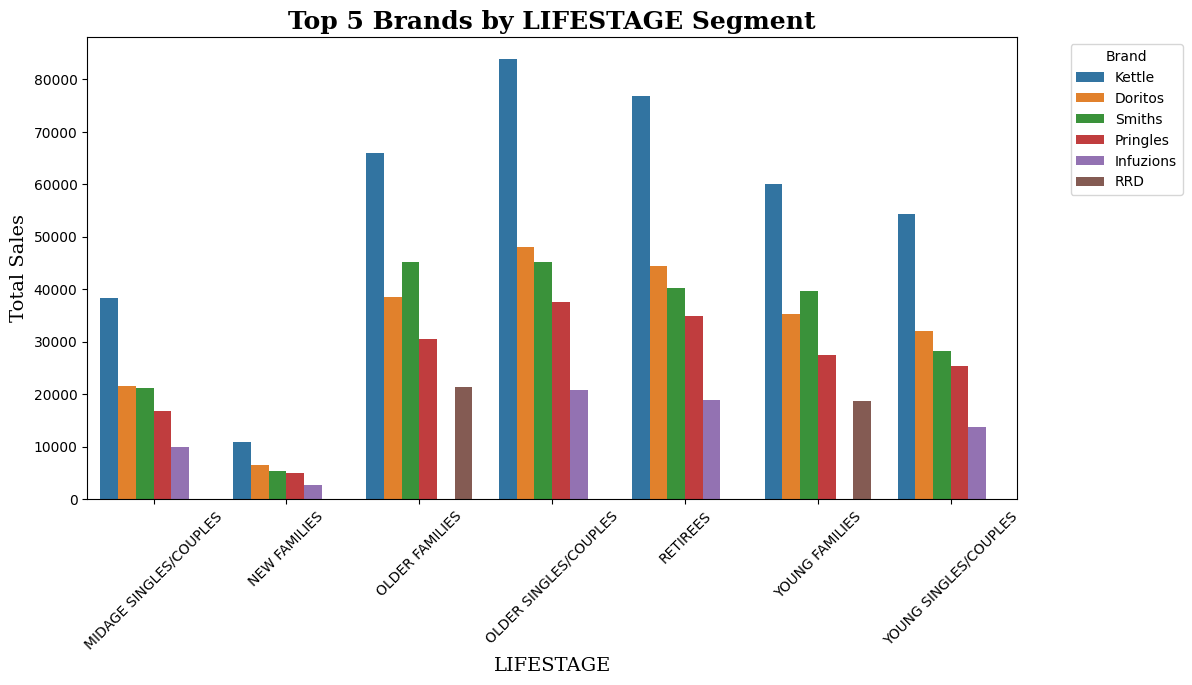

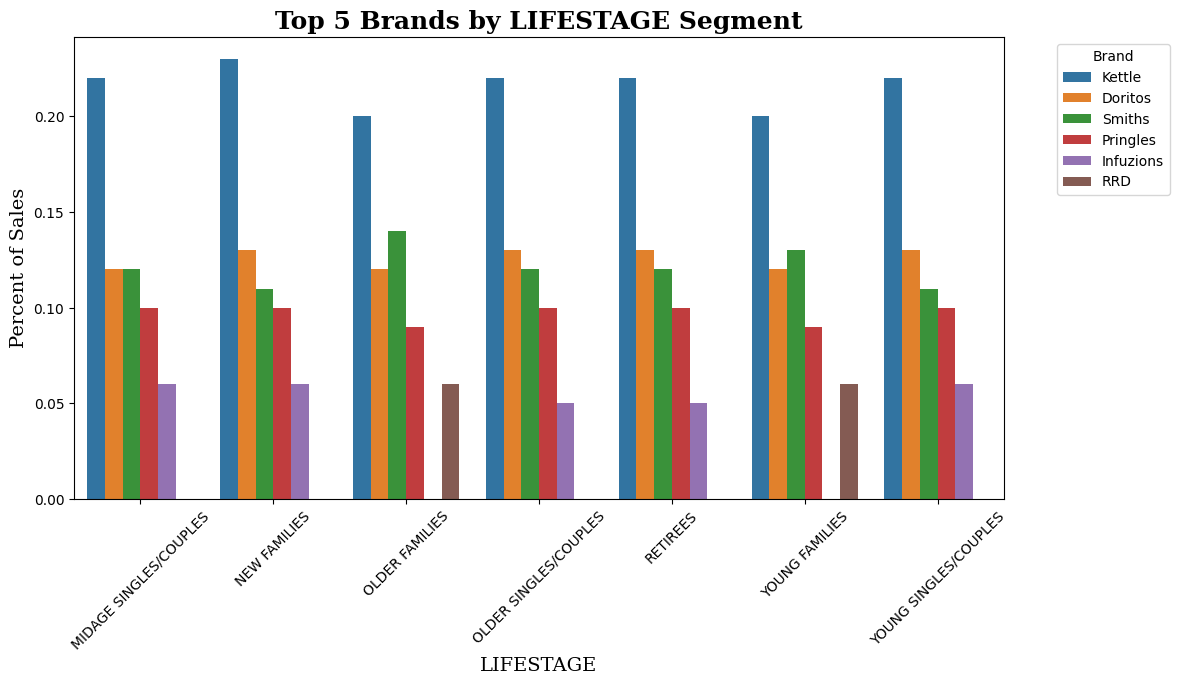

In [100]:
brand_counts = df.pivot_table(index='BRAND', columns='LIFESTAGE', values='TOT_SALES', aggfunc='sum', observed=False).round(0)
brand_counts

brand_prefs = brand_counts.div(brand_counts.sum(axis=0), axis=1)


# Step 1: Get the top 5 brands per LIFESTAGE
top_brands_per_lifestage = df.groupby(['LIFESTAGE', 'BRAND'], observed=False)['TOT_SALES'].sum().groupby(level=0, group_keys=False, observed=False).nlargest(5)
top_brands_per_lifestage


# Step 2: Reset index to make 'BRAND' a column
top_brands_per_lifestage = top_brands_per_lifestage.reset_index()
plt.figure(figsize=(12, 6))

# Use Seaborn to plot a grouped bar chart
sns.barplot(data=top_brands_per_lifestage, x='LIFESTAGE', y='TOT_SALES', hue='BRAND', palette='tab10')

# Formatting
plt.xticks(rotation=45)
plt.ylabel('Total Sales', fontsize=14, fontfamily='serif')
plt.xlabel('LIFESTAGE', fontsize=14, fontfamily='serif')
plt.title('Top 5 Brands by LIFESTAGE Segment', fontsize=18, fontfamily='serif', fontweight='bold')
plt.legend(title='Brand', bbox_to_anchor=(1.05, 1), loc='upper left')  # Move legend outside
plt.show()
plt.close()



# Add a new column for the ratio spent on those top 5 brands to total spent grouped per LIFESTAGE
total_spent_per_lifestage = brand_counts.sum(axis=0)
top_brands_per_lifestage['PERC_OF_TOT'] = (top_brands_per_lifestage['TOT_SALES'] / top_brands_per_lifestage['LIFESTAGE'].astype(str).map(total_spent_per_lifestage)).round(2)
top_brands_per_lifestage

plt.figure(figsize=(12, 6))

# Use Seaborn to plot a grouped bar chart
sns.barplot(data=top_brands_per_lifestage, x='LIFESTAGE', y='PERC_OF_TOT', hue='BRAND', palette='tab10')

# Formatting
plt.xticks(rotation=45)
plt.ylabel('Percent of Sales', fontsize=14, fontfamily='serif')
plt.xlabel('LIFESTAGE', fontsize=14, fontfamily='serif')
plt.title('Top 5 Brands by LIFESTAGE Segment', fontsize=18, fontfamily='serif', fontweight='bold')
plt.legend(title='Brand', bbox_to_anchor=(1.05, 1), loc='upper left')  # Move legend outside
plt.show()


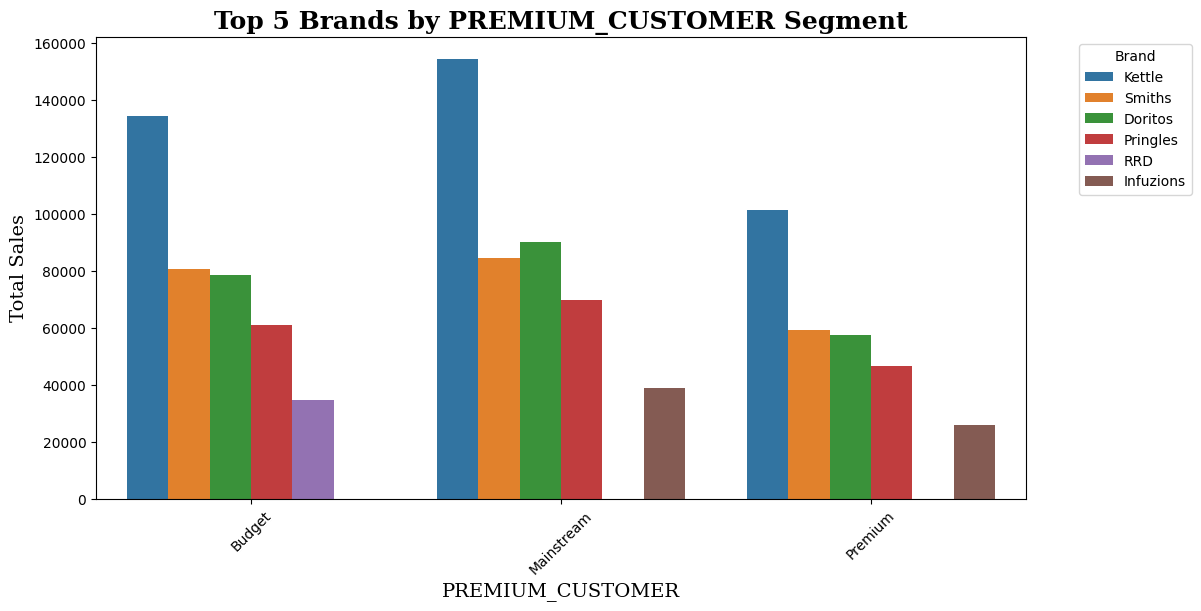

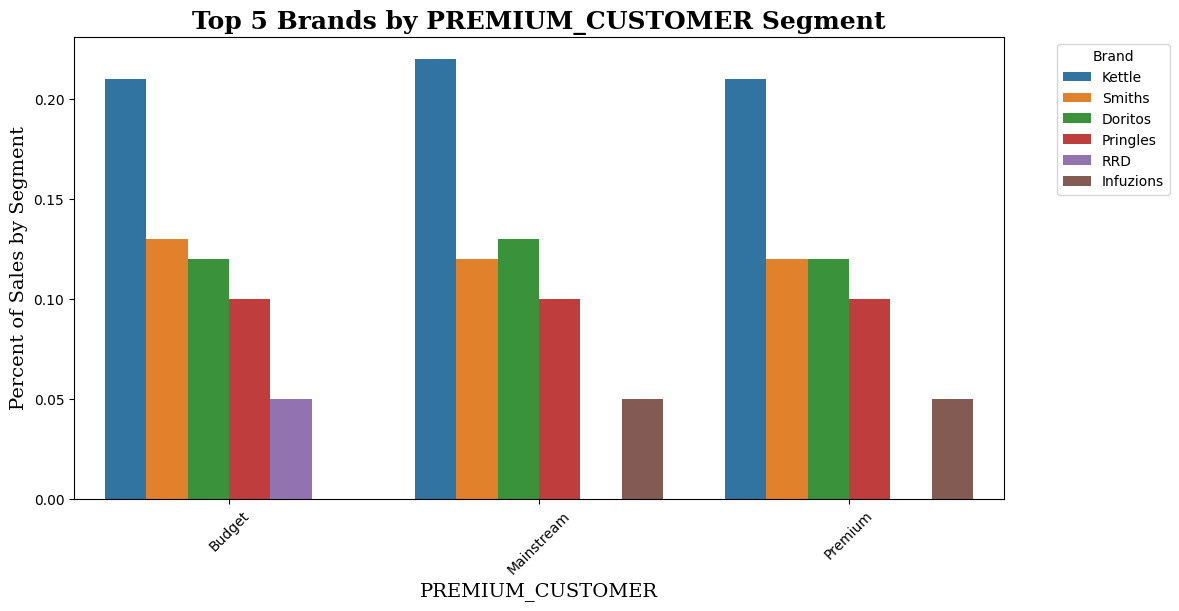

In [102]:
brand_counts = df.pivot_table(index='BRAND', columns='PREMIUM_CUSTOMER', values='TOT_SALES', aggfunc='sum', observed=False).round(0)
brand_counts

brand_prefs = brand_counts.div(brand_counts.sum(axis=0), axis=1)


# Step 1: Get the top 5 brands per PREMIUM_CUSTOMER
top_brands_per_lifestage = df.groupby(['PREMIUM_CUSTOMER', 'BRAND'], observed=False)['TOT_SALES'].sum().groupby(level=0, group_keys=False, observed=False).nlargest(5)
top_brands_per_lifestage


# Step 2: Reset index to make 'BRAND' a column
top_brands_per_lifestage = top_brands_per_lifestage.reset_index()
plt.figure(figsize=(12, 6))

# Use Seaborn to plot a grouped bar chart
sns.barplot(data=top_brands_per_lifestage, x='PREMIUM_CUSTOMER', y='TOT_SALES', hue='BRAND', palette='tab10')

# Formatting
plt.xticks(rotation=45)
plt.ylabel('Total Sales', fontsize=14, fontfamily='serif')
plt.xlabel('PREMIUM_CUSTOMER', fontsize=14, fontfamily='serif')
plt.title('Top 5 Brands by PREMIUM_CUSTOMER Segment', fontsize=18, fontfamily='serif', fontweight='bold')
plt.legend(title='Brand', bbox_to_anchor=(1.05, 1), loc='upper left')  # Move legend outside
plt.show()
plt.close()



# Add a new column for the ratio spent on those top 5 brands to total spent grouped per PREMIUM_CUSTOMER
total_spent_per_lifestage = brand_counts.sum(axis=0)
top_brands_per_lifestage['PERC_OF_TOT'] = (top_brands_per_lifestage['TOT_SALES'] / top_brands_per_lifestage['PREMIUM_CUSTOMER'].astype(str).map(total_spent_per_lifestage)).round(2)
top_brands_per_lifestage

plt.figure(figsize=(12, 6))

# Use Seaborn to plot a grouped bar chart
sns.barplot(data=top_brands_per_lifestage, x='PREMIUM_CUSTOMER', y='PERC_OF_TOT', hue='BRAND', palette='tab10')

# Formatting
plt.xticks(rotation=45)
plt.ylabel('Percent of Sales by Segment', fontsize=14, fontfamily='serif')
plt.xlabel('PREMIUM_CUSTOMER', fontsize=14, fontfamily='serif')
plt.title('Top 5 Brands by PREMIUM_CUSTOMER Segment', fontsize=18, fontfamily='serif', fontweight='bold')
plt.legend(title='Brand', bbox_to_anchor=(1.05, 1), loc='upper left')  # Move legend outside
plt.show()


Across all customer segments, Kettle chips consistently lead in total sales and account for the highest percentage of overall spend. This trend is evident in both total sales volume and the proportion of total spend, with Kettle chips surpassing the second-most popular brand, Smiths, by a significant margin of approximately 10% accross all segments. This suggests that Kettle chips dominate the market, with a clear preference from customers across various segments.

New families, young singles/couples, retirees, and Mainstream customers, in that order, pay on avergae the highest chip price. Interestingly, these groups also have a slightly lower percentage spend on Smith's chips and equal to slightly higher spending on Doritos and Kettle. These segments also have Infuzions as their #5. Thhe #5 spot is the variable here differing for every segment between Infuzions and RRD.

Do these customers buy more expensive brands? 

### Price of Brands/Gram

In [103]:
price_per_gram = df.loc[:, ['PREMIUM_CUSTOMER', 'LIFESTAGE', 'PROD_QTY', 'TOT_SALES', 'BRAND']]
price_per_gram['PRICE_BY_GRAM'] = (df['TOT_SALES']/df['PROD_QTY']/df['SIZE_IN_GRAMS']).round(5)
print(price_per_gram.groupby('BRAND')['PRICE_BY_GRAM'].mean().sort_values(ascending=False))

BRAND
Cobs Pop'd      0.034550
Infuzions       0.034521
Kettle          0.030790
Pringles        0.027609
Tyrrells        0.025449
Tostitos        0.025140
Doritos         0.023718
Sunbites        0.018890
Thins           0.018859
RRD             0.018074
Cheetos         0.017172
Grain Waves     0.017153
NCC             0.017140
French Fries    0.017140
Cheezels        0.017122
Twisties        0.017094
Smiths          0.017028
CCs             0.012000
Burger Rings    0.010450
Woolworths      0.010144
Name: PRICE_BY_GRAM, dtype: float64


Infuzions, Kettle, Pringles and Doritos all fall in the top 7 most expensive chips per gram. While, RRD and Smiths are the 10th and 11th most expensive respectively. This reinforces the reason the top spenders per chip bag are new families, young singles/couples, retirees, and Mainstream customers as they purchase more Infuzions, Kettle, Pringles and Doritos and less Smiths and RRD on average. 

### Who Spends the Most?

We will find the people who are among the top spenders on chips. I will add a new column assigning each customer loyalty card number a total spend.

In [104]:
df['TOTAL_SPENT'] = df['LYLTY_CARD_NBR'].map(df.groupby('LYLTY_CARD_NBR')['TOT_SALES'].sum())

In [105]:
indices = df.groupby('LYLTY_CARD_NBR')['TOT_SALES'].sum().sort_values(ascending=False).head(100).index
most_spent_df = behaviour_df[behaviour_df['LYLTY_CARD_NBR'].isin(indices)].copy()
most_spent_df['TOTAL_SPENT'] = most_spent_df['LYLTY_CARD_NBR'].map(df.groupby('LYLTY_CARD_NBR')['TOT_SALES'].sum().sort_values(ascending=False)).head(100)


segment_count = most_spent_df.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'], observed=False)['TOTAL_SPENT'].count().sort_values(ascending=False)
total_count = most_spent_df.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'], observed=False)['TOTAL_SPENT'].count().sum()
segment_count/total_count

LIFESTAGE               PREMIUM_CUSTOMER
YOUNG FAMILIES          Budget              0.20
OLDER FAMILIES          Budget              0.13
YOUNG FAMILIES          Premium             0.10
OLDER FAMILIES          Mainstream          0.10
OLDER SINGLES/COUPLES   Premium             0.08
RETIREES                Budget              0.07
YOUNG SINGLES/COUPLES   Mainstream          0.06
OLDER FAMILIES          Premium             0.05
OLDER SINGLES/COUPLES   Budget              0.05
MIDAGE SINGLES/COUPLES  Premium             0.04
OLDER SINGLES/COUPLES   Mainstream          0.03
YOUNG SINGLES/COUPLES   Budget              0.03
YOUNG FAMILIES          Mainstream          0.02
YOUNG SINGLES/COUPLES   Premium             0.02
RETIREES                Premium             0.01
MIDAGE SINGLES/COUPLES  Mainstream          0.01
RETIREES                Mainstream          0.00
NEW FAMILIES            Premium             0.00
                        Mainstream          0.00
                        Budg

so 20% of the top 100 spenders are budget young families. So theres a proportion of young families who buy regularly and probably in bulk too.

#### Single segment analysis

In [106]:
indices = df.groupby('LYLTY_CARD_NBR')['TOT_SALES'].sum().sort_values(ascending=False).head(100).index
most_spent_df = behaviour_df[behaviour_df['LYLTY_CARD_NBR'].isin(indices)].copy()
most_spent_df['TOTAL_SPENT'] = most_spent_df['LYLTY_CARD_NBR'].map(df.groupby('LYLTY_CARD_NBR')['TOT_SALES'].sum().sort_values(ascending=False).head(100))
most_spent_df.sort_values(by='TOTAL_SPENT', ascending=False)

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER,TOTAL_SPENT
60925,230078,OLDER FAMILIES,Budget,138.6
42813,162039,OLDER FAMILIES,Mainstream,126.8
16001,58361,YOUNG FAMILIES,Budget,124.8
17292,63197,OLDER FAMILIES,Budget,122.6
47959,179228,YOUNG FAMILIES,Budget,120.8
...,...,...,...,...
44844,168161,YOUNG FAMILIES,Budget,97.6
19727,72155,YOUNG FAMILIES,Budget,97.6
34859,128092,OLDER SINGLES/COUPLES,Premium,97.6
30719,113055,YOUNG FAMILIES,Budget,97.6


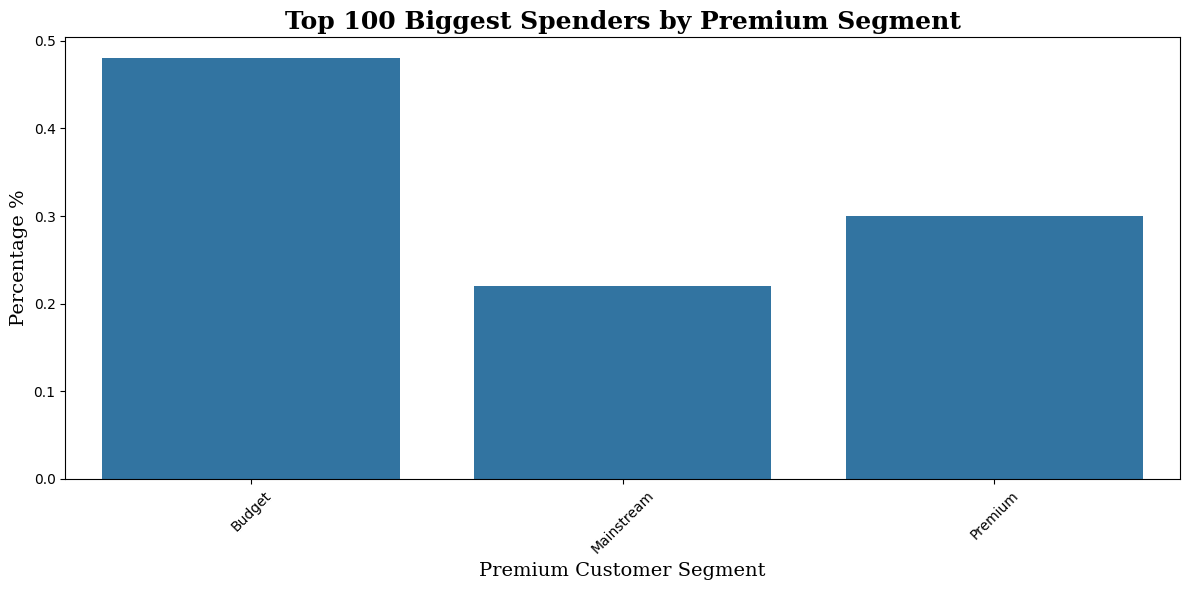

PREMIUM_CUSTOMER
Budget        0.48
Premium       0.30
Mainstream    0.22
Name: count, dtype: float64

In [107]:
segment_count = most_spent_df['PREMIUM_CUSTOMER'].value_counts()
total_count = most_spent_df['PREMIUM_CUSTOMER'].count()

plt.figure(figsize=(12,6))
ax = sns.barplot(x=segment_count.index, y=segment_count/total_count)
plt.xlabel('Premium Customer Segment', fontsize=14, fontfamily='serif')
plt.ylabel('Percentage %', fontsize=14, fontfamily='serif')
plt.title('Top 100 Biggest Spenders by Premium Segment', fontsize=18, fontweight='bold', fontfamily='serif')
plt.xticks(rotation=45) 

plt.tight_layout()
plt.show()


segment_count/total_count

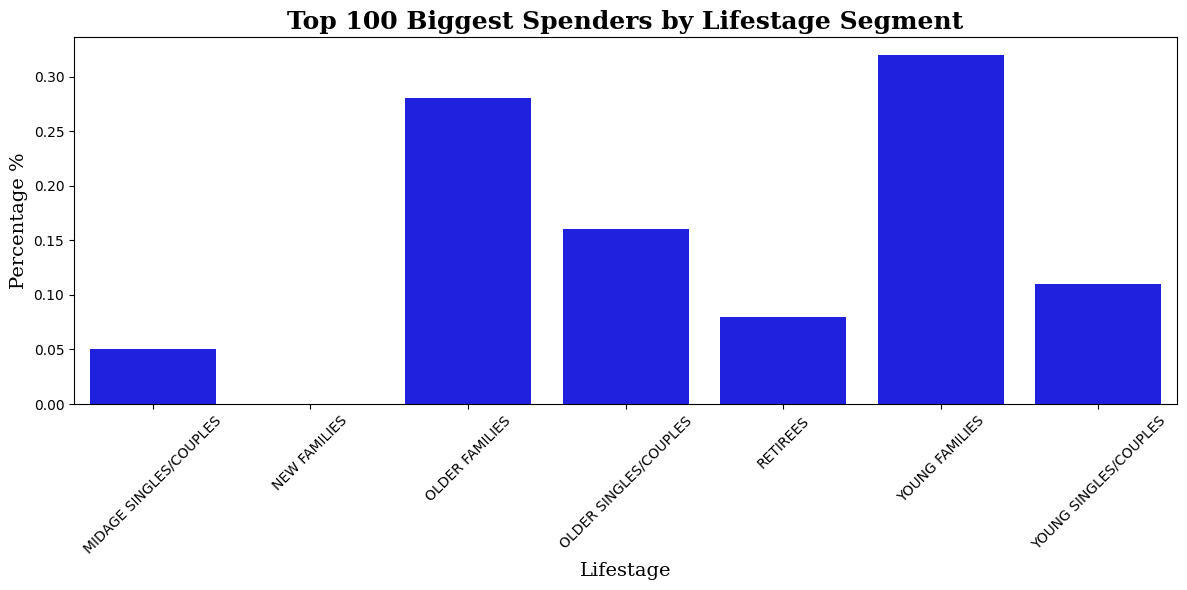

In [108]:
segment_count = most_spent_df['LIFESTAGE'].value_counts()
total_count = most_spent_df['LIFESTAGE'].count()

plt.figure(figsize=(12,6))
ax = sns.barplot(x=segment_count.index, y=segment_count/total_count, color='blue')
plt.xlabel('Lifestage', fontsize=14, fontfamily='serif')
plt.ylabel('Percentage %', fontsize=14, fontfamily='serif')
plt.title('Top 100 Biggest Spenders by Lifestage Segment', fontsize=18, fontweight='bold', fontfamily='serif')
plt.xticks(rotation=45) 

plt.tight_layout()
plt.show()

---

# We have found some intersting insights and there are a few stratergies we can adopt moving forward.
---

# 1. Target High-Spending Customers Segments More Aggresivley and Maximise Revenue per Customer

# Top Spending Segments by Lifestage or Premium Customer Status:
## Key Findings:
New Families, Retirees, and Young Singles/Couples are the highest-paying segments per chip packet. They each spend the following amounts:
- New Families: $3.89 per chip packet
- Retirees: $3.88 per chip packet
- Young Singles/Couples: $3.88 per chip packet
- Mainstream: $3.86 per chip packet


Despite new families paying higher $ per chip, the retiree and young singles/couples segments represent the largest share of total sales among these segments, with 19% and 14% market share, respectively. On the other hand, new families contribute the smallest share of all semgents to total sales. Mainstream buyers account for 39% of the market, dominating the premium_customer segment.

However, when analyzing the top 100 individual spenders on chips, the breakdown is as follows:
- New Families: 0% of the top 100 spenders
- Retirees: 8% of the top 100 spenders
- Young Singles/Couples: 11% of the top 100 spenders
- Mainstream: 22% of the top 100 spenders

This indicates that these segments are not typically bulk buyers but rather engage in smaller, more frequent purchases. This likely contributes to their higher $ per chip packet.


## Spending Patterns and Preferences:
We also observed that these segments favor premium brands. On average, they tend to buy more of the following premium or healthier brands:
Kettle
Doritos
Pringles
Infuzions

Conversely, they purchase fewer budget-friendly brands like Smiths and RRD. This preference indicates a stronger inclination towards higher-quality, healthier snacks.


# Top Spending Segments by Lifestage and Premium Customer Status:

When analyzing spend by lifestage and premium customer status, we find that the highest spenders per chip packet are:

- YOUNG SINGLES/COUPLES   Mainstream          $4.05
- MIDAGE SINGLES/COUPLES  Mainstream          $3.98
- RETIREES                Premium             $3.91


These results further confirm that customers in both mainstream and premium segments are more inclined toward quality products.


In the top 100 individual spenders, the following contributions from these high-spending segments are observed:
Young Singles/Couples (Mainstream): 7%
Mid-Age Singles/Couples (Mainstream): 1%
Retirees (Premium): 1%


Although these segments spend more per chip packet, they contribute less to the top spenders list, indicating that they typically make smaller, less frequent purchases.


## Spending Patterns and Preferences:

These groups also purchased more Ketlle chips, spending 75% more on Ketlle chips than the second most purchased brand. We also observe the same trend in brand preference as the previous discussion.



## Statistical Significance:
All observed differences in spending patterns across these segments were found to be statistically significant, adding credibility to these insights.



# Strategic Recommendations:

## A. Prioritize Premium and Health-Conscious Chip Brands:
Given the preference for premium products, including Kettle, Doritos, Pringles, and Infuzions, we recommend a targeted promotional push for these brands. This approach will appeal to the quality-focused segments, including Retirees and Young Singles/Couples, who are willing to spend more for better snacks.
## B. Position Kettle Chips as the Premium Choice:
Since Kettle chips are a standout favorite across all segments, positioning them as the top-tier option is crucial. Kettle is consistently purchased 10%-15% more than the second-most popular brand, making it a key driver of premium sales.
## C. Tailor Promotions to Smaller, High-Value Purchases:
Given that these high-paying segments are not bulk buyers, offer promotions that encourage smaller, more frequent purchases. This can include discounts for single-bag purchases or loyalty programs offering rewards after a set number of individual purchases.



# Conclusion:
By targeting the high-spending segments more aggressively and focusing on premium products such as Kettle, Doritos, and Infuzions, there is a significant opportunity to maximize revenue. These segments are already inclined to spend more per chip packet, and tailored promotional strategies can encourage even greater engagement with premium brands.

---

# Targeting the Largest Contributors to Revenue

We can also target older families, older singles/couple, and younger families. They make up the 3rd, 1st, and 4th biggest contributions to chip sales. Furthermoe, they are also 2nd, 3rd, and 1st among top 100 spenders totaling a 71% share of top 100 spenders.

This indicates that these customers prefer to buy in bulk. 

Among these segments, the highest contributors to the total spending are distributed among premium_customer segments as follows:
- 44% of Younger families are budget
- 48% Older families are budget
- Older singles/couple distributed evenly as: budget 34%, mainstream 33%, premium 33%.

This indicates that these segments belong to budget segment, hence genrally prefering the cheapest brands.

Within these segments we do see a 10%-30% increase in the purchase of Smiths chips and a similar reduction in Kettle brand. Furthermore Older families, Younger families, and budget segments are the only ones who have a preference to RRD over infuzions for their 5th most purchased chips.


## Key Findings

The data reveals important patterns regarding market contributions and spending habits among various customer segments. Older families, older singles/couples, and younger families together represent a significant portion of chip sales. These three segments contribute to the following:
- Older families: 3rd largest contribution to total chip sales
- Older singles/couples: 1st largest contribution to total chip sales
- Younger families: 4th largest contribution to total chip sales

Moreover, when examining the top 100 spenders, these same segments stand out:
- Older families: 2nd largest contributor among the top 100 spenders
- Older singles/couples: 3rd largest contributor
- Younger families: 1st largest contributor


In total, these three segments account for 71% of the top 100 spenders, signaling that they are high-value customers. This suggests that these groups have a strong preference for bulk purchasing, potentially contributing to their high spending.


## Segmentation Insights

A deeper look into the premium customer status distribution among these segments highlights a clear trend toward budget-conscious buying:
- Younger families: 44% are in the budget segment
- Older families: 48% are in the budget segment
- Older singles/couples: 34% are in the budget segment, with the remaining 33% split between mainstream and premium

This reveals that these segments are primarily budget-conscious, with a substantial portion of them opting for cheaper chip brands.


## Brand Preferences and Purchase Behavior

Despite their budget-conscious tendencies, we observe the following:
### Smiths Chips:
These segments have experienced a 10%-30% increase in Smiths chip purchases, signaling a shift toward more affordable options.
### Kettle Chips:
Conversely, while Kettle remain the favourite brand, these segments show a similar reduction in percentage of Kettle chip purchases, likely driven by their price sensitivity.
### RRD vs. Infuzions:
Notably, Older families, Younger families, and the budget segments are the only ones who show a preference for RRD chips over Infuzions as their 5th most purchased brand. This suggests a preference for value-oriented snacks over premium, health-focused options.

# Strategy Recommendations

To maximize revenue and appeal to these key customer segments, the following strategies are recommended:
## A. Promotions and Bulk Offers:
Given the preference for bulk purchases, consider offering volume discounts or bundled deals targeted at the older families, older singles/couples, and younger families. This could encourage larger, more frequent purchases.
## B. Focus on Budget-Friendly Brands:
Tailor your marketing efforts to emphasize budget-friendly options. Since many of these segments are predominantly in the budget category, focusing on brands like Smiths will align with their purchasing habits.
## Position RRD as a Key Brand:
Leverage the preference for RRD chips in the budget segments. Position RRD as the go-to snack for price-conscious consumers, especially among the older and younger family segments.

## Segment-Specific Messaging:
Develop targeted messaging for each segment to reflect their unique preferences. For example, emphasize value for money and larger pack sizes for the budget-conscious customers, while offering occasional premium options for those with mainstream or premium status within each segment.



By strategically targeting these high-value, bulk-buying customers with appropriate offers and tailored messaging, it is possible to increase customer loyalty and maximize both revenue and market share.

In [109]:
df.to_csv('QVI_clean.scv')

In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249668 entries, 0 to 249667
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   LYLTY_CARD_NBR    249667 non-null  float64       
 1   LIFESTAGE         249667 non-null  category      
 2   PREMIUM_CUSTOMER  249667 non-null  category      
 3   DATE              249668 non-null  datetime64[ns]
 4   STORE_NBR         249667 non-null  float64       
 5   TXN_ID            249667 non-null  float64       
 6   PROD_NBR          249667 non-null  float64       
 7   PROD_NAME         249667 non-null  object        
 8   PROD_QTY          249667 non-null  float64       
 9   TOT_SALES         249667 non-null  float64       
 10  YEAR              249668 non-null  int32         
 11  MONTH             249668 non-null  category      
 12  DAY               249668 non-null  category      
 13  SIZE_IN_GRAMS     249667 non-null  float64       
 14  BRAN